# IT304S: Contratação de Energia para Grandes Consumidores.
##Prof. Dr. Luiz Carlos Pereira da Silva

# Definição de ciência de dados 

A ciência de dados pode ser definida como um conjunto de técnicas de analise de dados para obter e apresentar informações úteis para um usuario. 

# Metodologia

Uma metodologia muito utilizado para analisar dados é o chamado ``CRISP-DM", por suas siglas em inglês: Cross-Industry Standard Process for Data Mining. O CRISP-DM tem seis etapas que são:

* **Business Understanding:** Definição dos objetivos, declaração do problema, * * pergunta de interesse.
* **Data Understanding:** Utilização de nosso conhecimento para coletar os dados.
* **Data Preparation:** Manipulação de dados para a eliminação de outliers e dados faltantes.
* **Modeling:** Modelo ou abordagem utilizado para estudar o comportamento de nosso sistema a partir de nossos dados.
* **Evaluation:** Avaliação dos resultados obtidos, no contexto se são de ajuda para responder nossa pergunta de interesse.
* **Deployment:** Disponibilizar o análise de dados.

# Business Understanding

* **Definição dos objetivos:** O objetivo do presente notebook é apresentar as variaveis disponíveis no banco de dados UFFS.xlsx.
* **Declaração do problema:** O arquivo UFFS.xlsx, contém as informações disponíveis das planilhas elétricas da UFFS, precisamos de fazer um analize exploratorio dos dados para conhecer os dados disponíveis da UFFS.
* **Perguntas de Interesse:**
Há dados faltantes?

# Data Understanding:

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!git clone https://github.com/juliobento9131/IT304S_Trabalho_Parte_2.git

fatal: destination path 'IT304S_Trabalho_Parte_2' already exists and is not an empty directory.


In [3]:
import pandas as pd

In [4]:
abas_de_excel =  pd.ExcelFile("/content/drive/Shareddrives/IT304S - Comercialização de Energia Elétrica para Grandes Clientes/Projeto/Planilhas - Universidades/Grupo 15 - UFFS/Preencher_universidade.xlsx")
abas_de_excel.sheet_names

['Apresentação', 'UC1', 'UC2', 'UC3', 'UC4', 'UC5', 'UC6']

In [5]:
UC5 = abas_de_excel.parse("UC5")
UC5.shape

(77, 30)

In [6]:
UC6 = abas_de_excel.parse("UC6")
UC6.shape

(60, 30)

In [7]:
UC5.head()

DATA   ANO  MÊS  ...  ACRESCIMO_BAMAR  ACRESCIMO_BVERM1  ACRESCIMO_BVERM2
0 2014-01-01  2014    1  ...              0.0               0.0               0.0
1 2014-02-01  2014    2  ...              0.0               0.0               0.0
2 2014-03-01  2014    3  ...              0.0               0.0               0.0
3 2014-04-04  2014    4  ...              0.0               0.0               0.0
4 2014-05-05  2014    5  ...              0.0               0.0               0.0

[5 rows x 30 columns]

In [8]:
UC6.head()

DATA   ANO  MÊS  ...  ACRESCIMO_BAMAR  ACRESCIMO_BVERM1  ACRESCIMO_BVERM2
0 2015-07-01  2015    7  ...              0.0           2497.91               0.0
1 2015-08-01  2015    8  ...              0.0           2494.25               0.0
2 2015-09-01  2015    9  ...              0.0           2761.97               0.0
3 2015-10-01  2015   10  ...              0.0           2760.94               0.0
4 2015-11-01  2015   11  ...              0.0           3161.92               0.0

[5 rows x 30 columns]

# Data Preparation:

In [9]:
import numpy as np

In [10]:
np.nan + np.nan

nan

In [11]:
np.nan == np.nan

False

In [12]:
np.isnan(np.nan)

True

In [13]:
data = []
for colm in UC5.columns[3:]:
  data.append([colm, UC5.shape[0]-UC5[colm].apply(np.isnan).sum(), UC5[colm].apply(np.isnan).sum(), (UC5[colm].apply(np.isnan).sum()/77)])
dados_faltantes = pd.DataFrame(data, columns=["Variavel", "Quantidade de dados Disponíveis", "Quantidade de dados Faltantes", "Percentagem de Dados Faltantes" ])
dados_faltantes = dados_faltantes[dados_faltantes["Quantidade de dados Faltantes"]>0].sort_values(by=['Quantidade de dados Faltantes'], ascending=False).reset_index(drop=True)
dados_faltantes['Percentagem de Dados Faltantes'] = dados_faltantes['Percentagem de Dados Faltantes'].astype(float).map("{:.2%}".format)
dados_faltantes

Variavel  ...  Percentagem de Dados Faltantes
0  DEMANDA_CONTRATADA_P  ...                         100.00%
1      DEMANDA_ISENTA_P  ...                         100.00%
2         TAR_TUSD_KW_P  ...                         100.00%

[3 rows x 4 columns]

In [14]:
data = []
for colm in UC6.columns[3:]:
  data.append([colm, UC6.shape[0]-UC6[colm].apply(np.isnan).sum(), UC6[colm].apply(np.isnan).sum(), (UC6[colm].apply(np.isnan).sum()/60)])
dados_faltantes = pd.DataFrame(data, columns=["Variavel", "Quantidade de dados Disponíveis", "Quantidade de dados Faltantes", "Percentagem de Dados Faltantes" ])
dados_faltantes = dados_faltantes[dados_faltantes["Quantidade de dados Faltantes"]>0].sort_values(by=['Quantidade de dados Faltantes'], ascending=False).reset_index(drop=True)
dados_faltantes['Percentagem de Dados Faltantes'] = dados_faltantes['Percentagem de Dados Faltantes'].astype(float).map("{:.2%}".format)
dados_faltantes

Variavel  ...  Percentagem de Dados Faltantes
0  DEMANDA_CONTRATADA_P  ...                         100.00%
1      DEMANDA_ISENTA_P  ...                         100.00%
2         TAR_TUSD_KW_P  ...                         100.00%

[3 rows x 4 columns]

## Visualização de Dados Faltantes

In [15]:
import missingno as msno

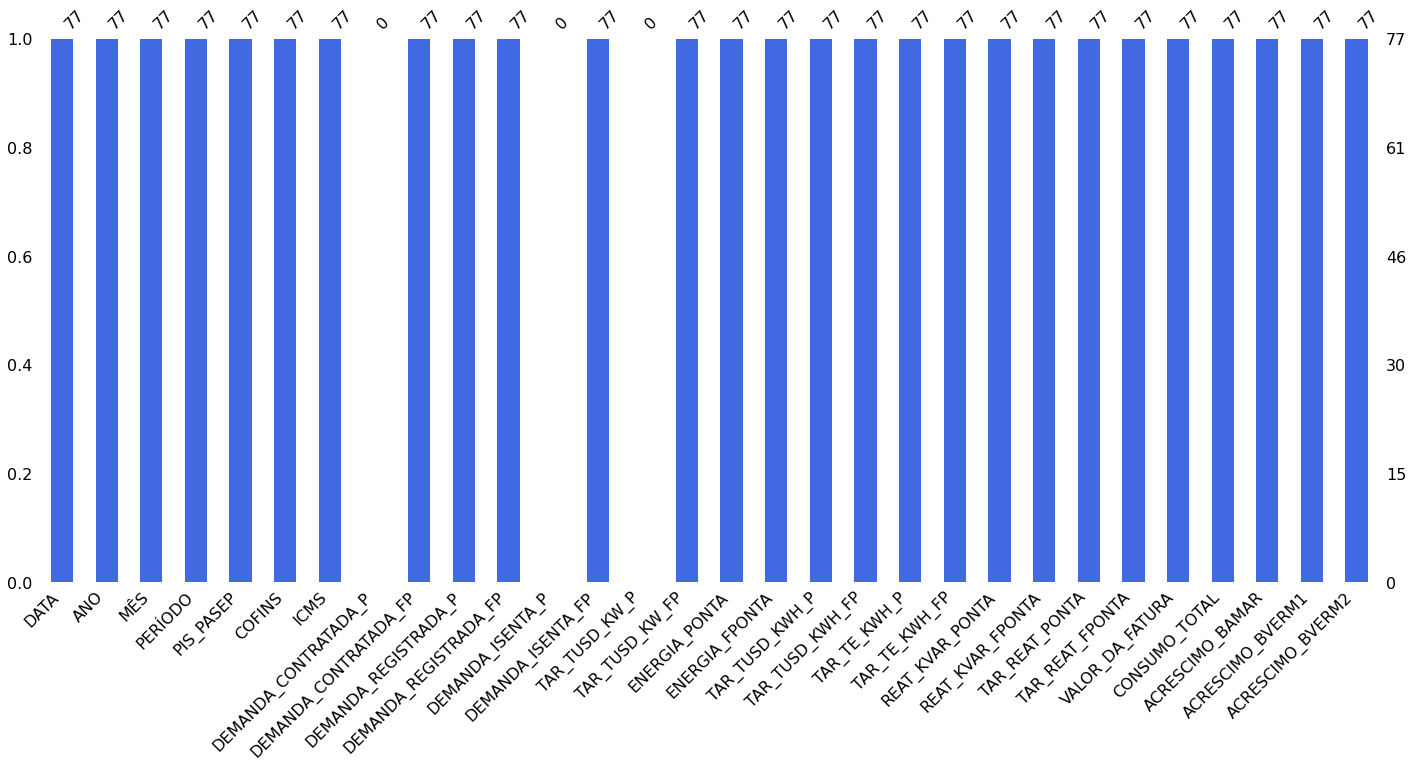

In [16]:
msno.bar(UC5, color="RoyalBlue") #para visualizar a integridade do datafram

In [17]:
msno.bar(UC6, color="RoyalBlue") #para visualizar a integridade do datafram

## Matriz de Dados Faltantes

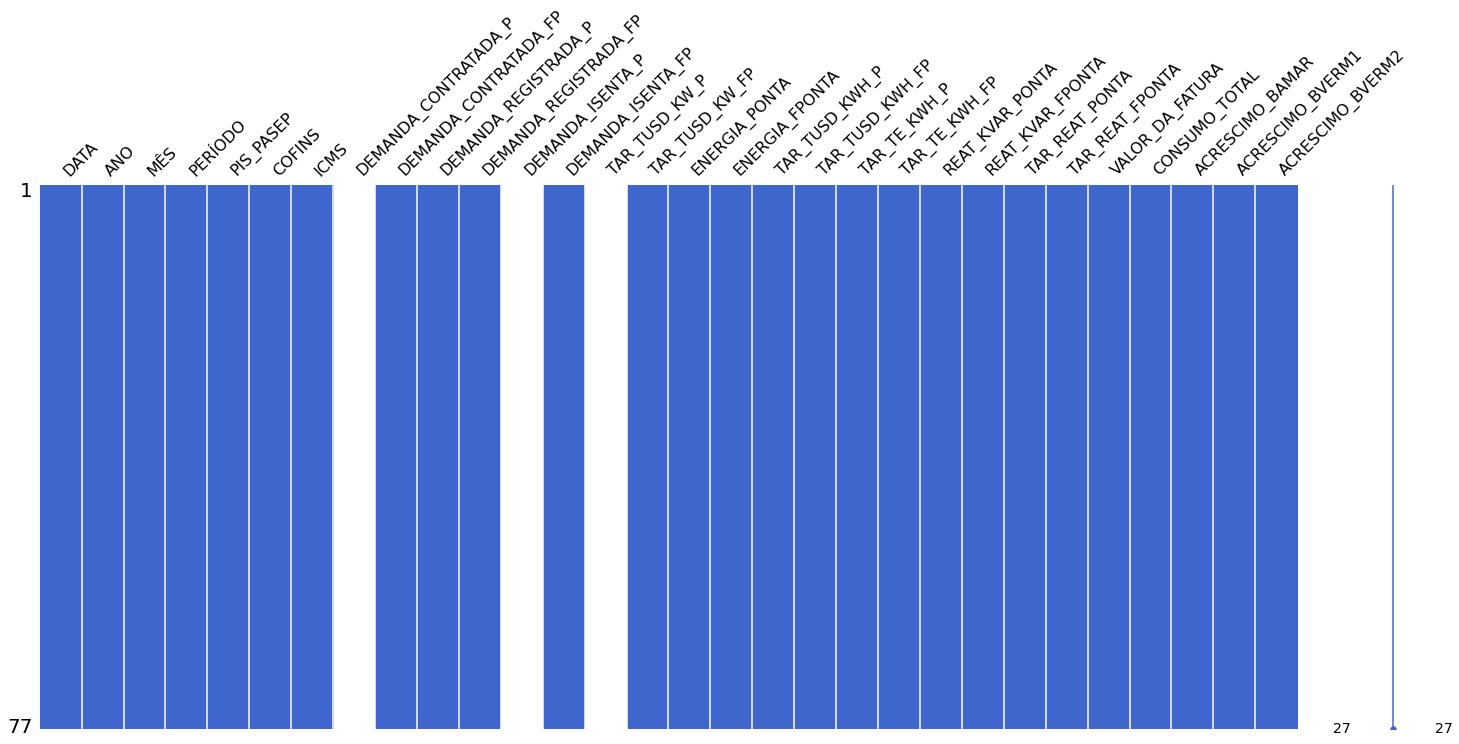

In [18]:
msno.matrix(UC5, color = (0.25,0.4,0.8))

In [19]:
msno.matrix(UC6, color = (0.25,0.4,0.8))

## Matriz de Correlação de Dados Faltantes

In [20]:
msno.heatmap(UC5)

/usr/local/lib/python3.6/dist-packages/seaborn/matrix.py:301: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/usr/local/lib/python3.6/dist-packages/seaborn/matrix.py:301: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


In [21]:
msno.heatmap(UC6)

/usr/local/lib/python3.6/dist-packages/seaborn/matrix.py:301: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/usr/local/lib/python3.6/dist-packages/seaborn/matrix.py:301: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


### Dendogram de dados Faltantes

In [22]:
msno.dendrogram(UC5)

In [23]:
msno.dendrogram(UC6)

## Eliminação de colunas com excesso de dados Faltantes

In [24]:
UC5_df = UC5.drop(set(UC5.columns[UC5.isnull().mean() >0.5]), 1)
UC5_df.shape

(77, 27)

In [25]:
UC6_df = UC6.drop(set(UC6.columns[UC6.isnull().mean() >0.5]), 1)
UC6_df.shape

(60, 27)

## Visualização de Variaveis

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [27]:
f, axs = plt.subplots(5, 5,figsize=(20,20))
for i,col in enumerate(UC5_df.columns[3:]):
  plt.subplot(5, 5, i+1)
  plt.title(col)
  plt.plot(UC5_df.DATA, UC5_df[col])

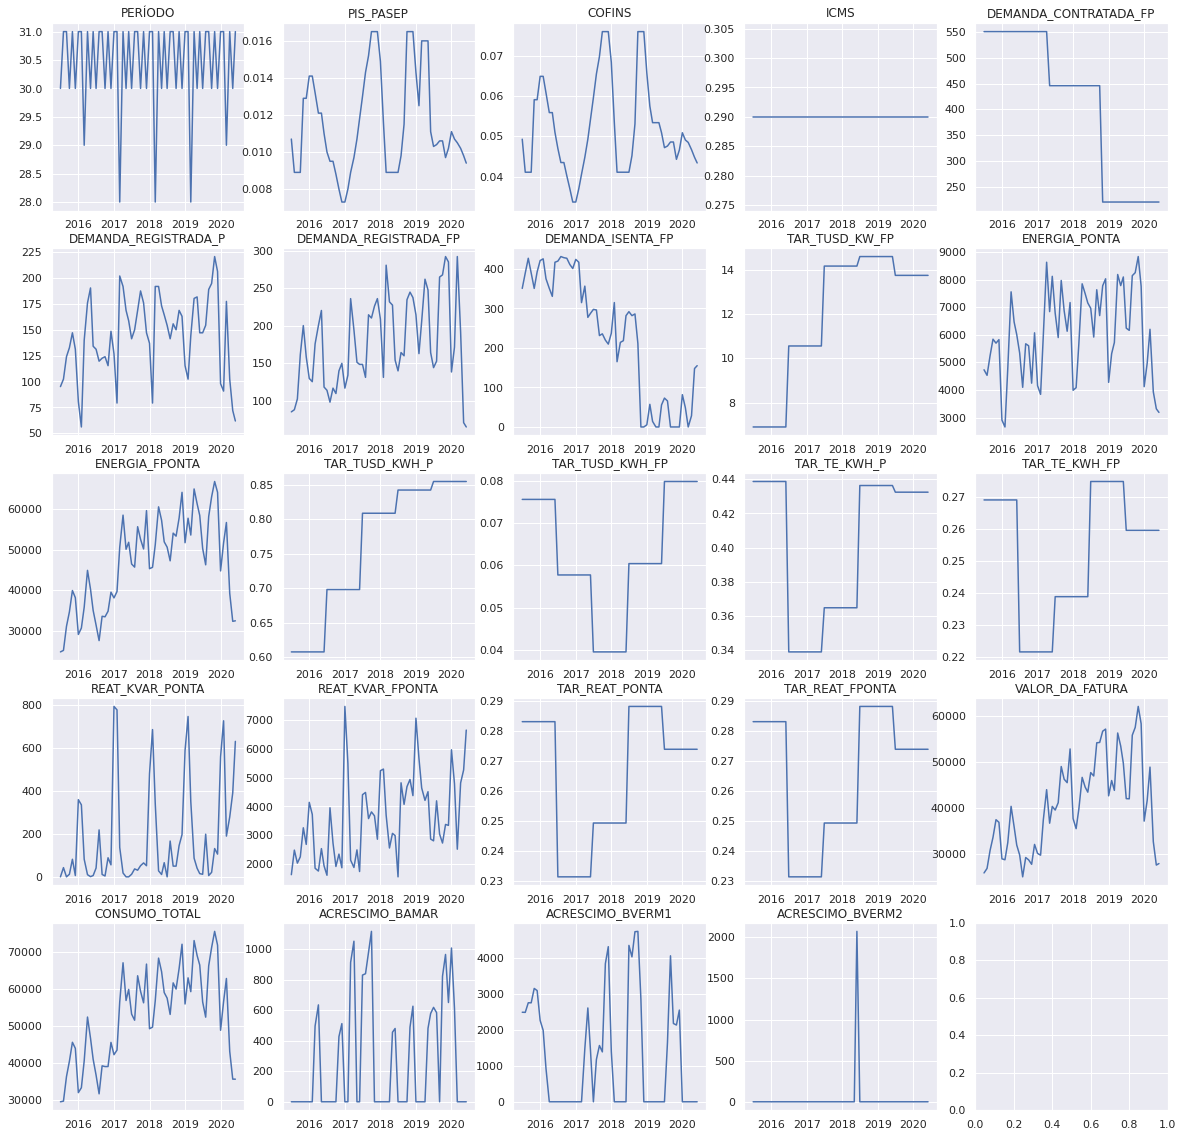

In [28]:
f, axs = plt.subplots(5, 5,figsize=(20,20))
for i,col in enumerate(UC6_df.columns[3:]):
  plt.subplot(5, 5, i+1)
  plt.title(col)
  plt.plot(UC6_df.DATA, UC6_df[col])

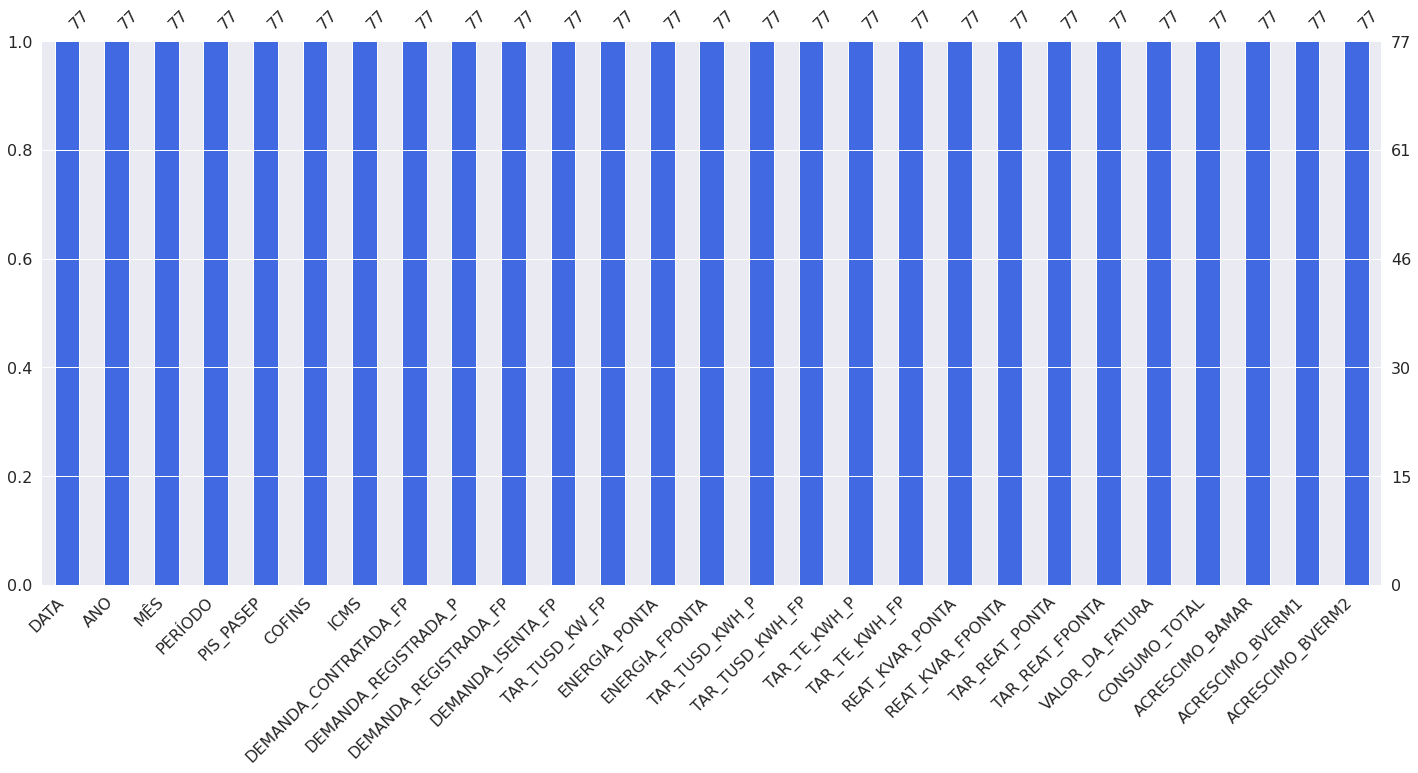

In [29]:
msno.bar(UC5_df, color="RoyalBlue")

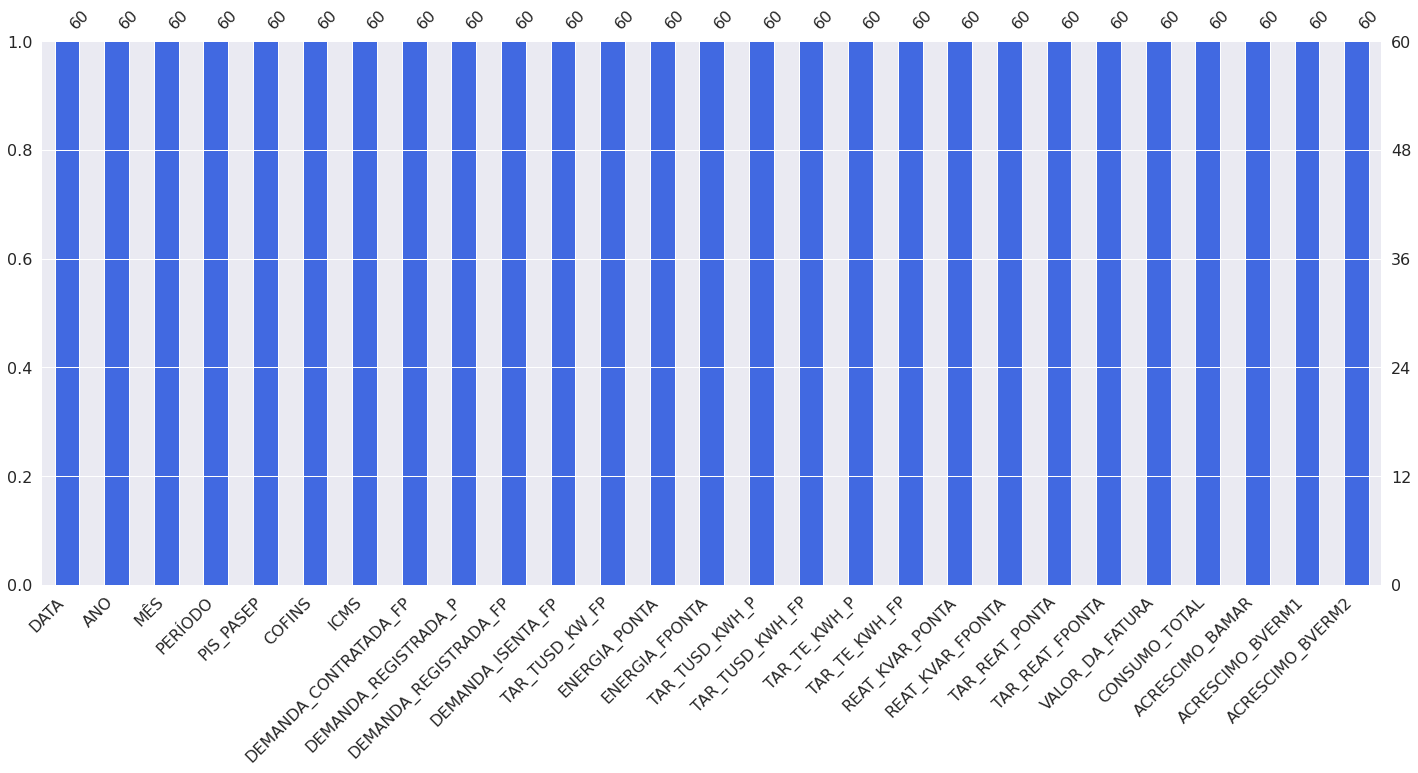

In [30]:
msno.bar(UC6_df, color="RoyalBlue")

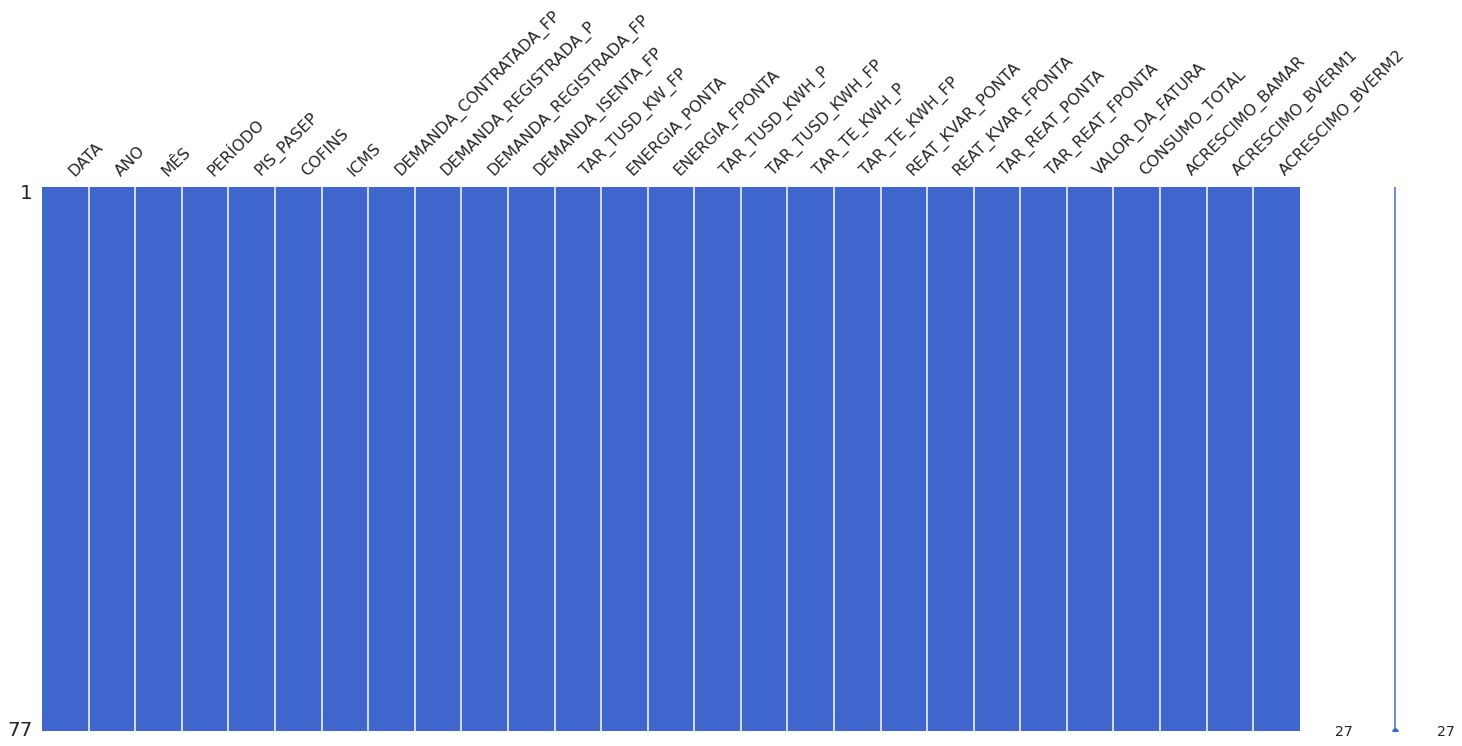

In [31]:
msno.matrix(UC5_df, color = (0.25,0.4,0.8))

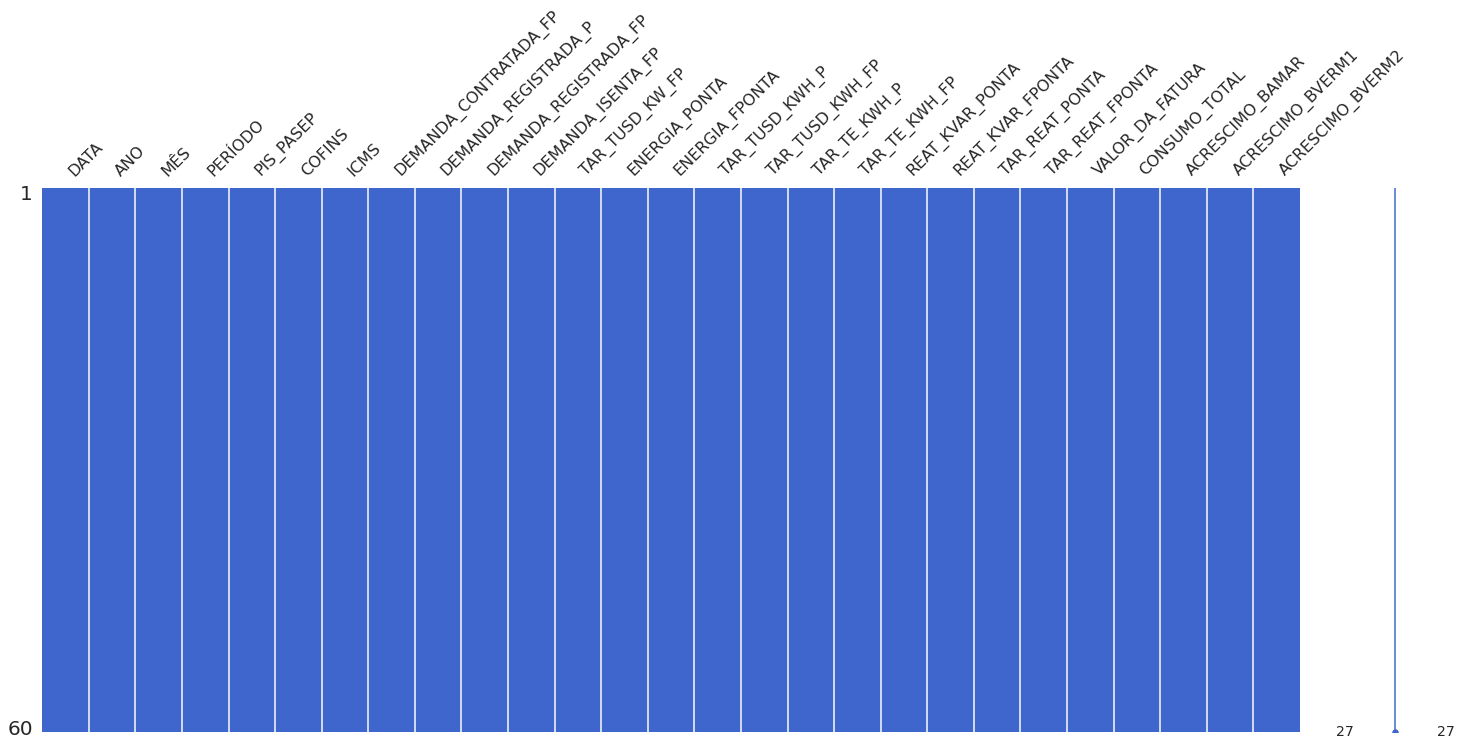

In [32]:
msno.matrix(UC6_df, color = (0.25,0.4,0.8))

## Tratamento dos dados

Tratamento das colunas com dados faltantes da UC5 >> Não encontrados.

Tratamento das colunas com dados faltantes da UC6 >> Não encontrados.

## Outliers
https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

Matriz de correlação 

In [33]:
cor = UC5_df
pear = round(cor.corr(),2)
teste = np.array(pear)
mask = np.zeros_like(pear)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20, 15))
    ax = sns.heatmap(pear, mask=mask, vmax=1, square=True,center=0,annot=True,annot_kws={"fontsize":14}, cmap="RdBu")
    plt.title('''Pearson's Correlation Heatmap''',fontsize = 20)
    plt.xticks(fontsize=17,rotation=90)
    plt.yticks(fontsize=17,rotation=0)
    cax = plt.gcf().axes[-1] #para alterar fonte do eixo y direito
    cax.tick_params(labelsize=20) #para alterar fonte do eixo y direito

In [34]:
corr = UC5_df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

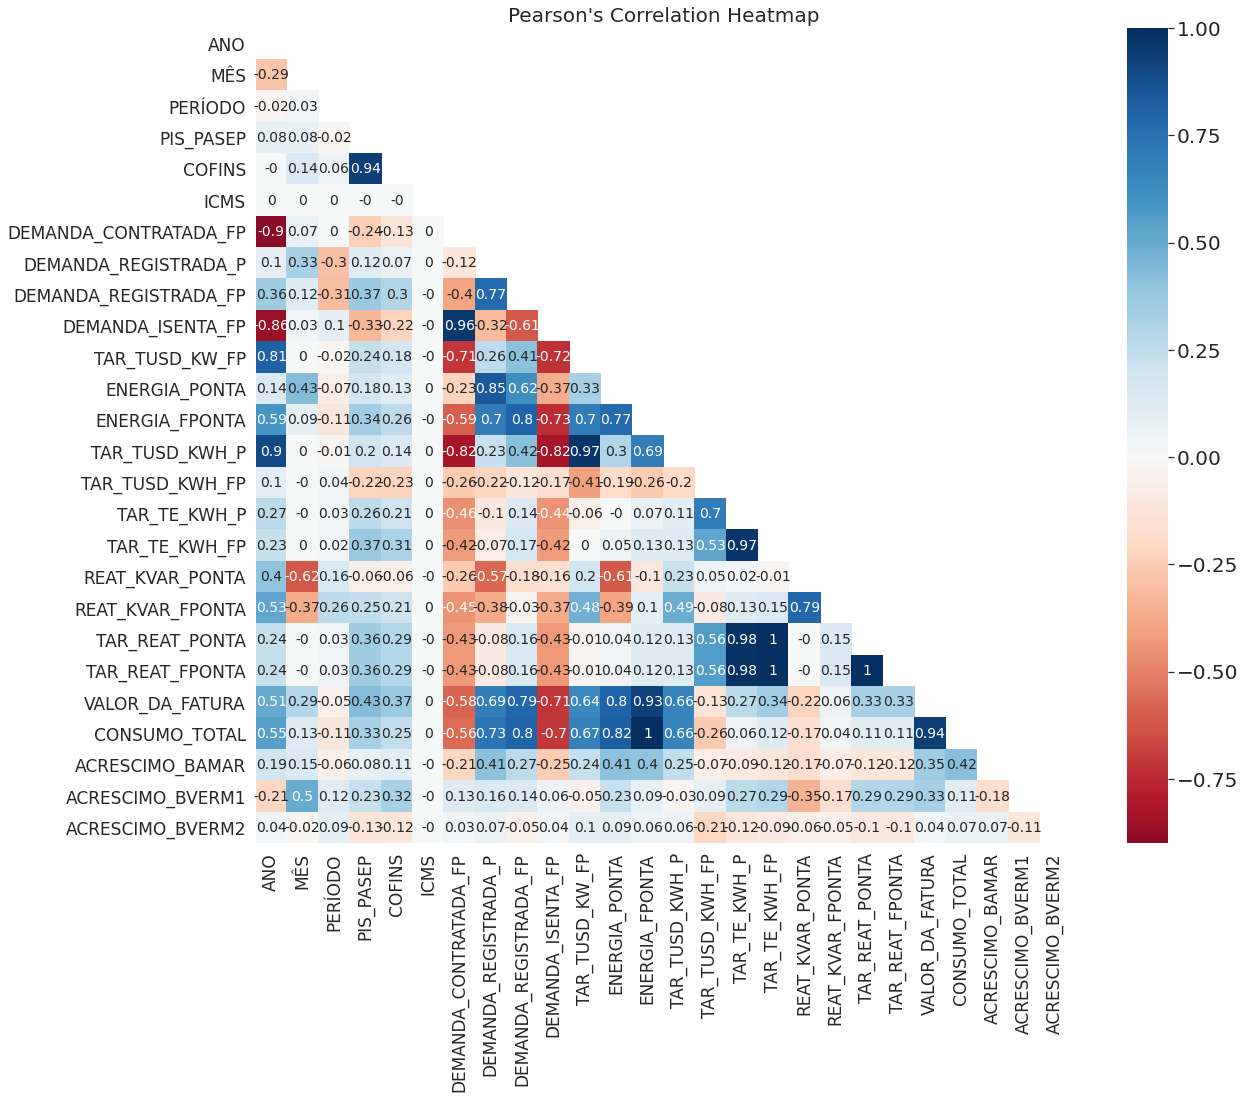

In [35]:
cor = UC6_df
pear = round(cor.corr(),2)
teste = np.array(pear)
mask = np.zeros_like(pear)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20, 15))
    ax = sns.heatmap(pear, mask=mask, vmax=1, square=True,center=0,annot=True,annot_kws={"fontsize":14}, cmap="RdBu")
    plt.title('''Pearson's Correlation Heatmap''',fontsize = 20)
    plt.xticks(fontsize=17,rotation=90)
    plt.yticks(fontsize=17,rotation=0)
    cax = plt.gcf().axes[-1] #para alterar fonte do eixo y direito
    cax.tick_params(labelsize=20) #para alterar fonte do eixo y direito

In [36]:
corr = UC6_df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

### Método Z score
https://en.wikipedia.org/wiki/Standard_score#/media/File:The_Normal_Distribution.svg

In [37]:
def z_score (data, treshold =4):
  outliers = []
  treshold = treshold
  mean, std = np.mean(data), np.std(data)
  for i in data:
    zscore = (i-mean)/std
    if np.abs(zscore) > treshold:
      outliers.append(i)
  
  return outliers

In [38]:
outliers = z_score(UC5_df[["ANO"]].values, 4)
outliers


[]

In [39]:
outliers = z_score(UC5_df[["PERÍODO"]].values, 4)
outliers


[]

In [40]:
outliers = z_score(UC5_df[["PIS_PASEP"]].values, 4)
outliers


[]

In [41]:
outliers = z_score(UC5_df[["COFINS"]].values, 4)
outliers


[]

In [42]:
outliers = z_score(UC5_df[["ICMS"]].values, 4)
outliers


[]

In [43]:
outliers = z_score(UC5_df[["DEMANDA_CONTRATADA_FP"]].values, 4)
outliers


[array([553.19])]

In [44]:
print(len(outliers)/len(UC5_df[["DEMANDA_CONTRATADA_FP"]].values)*100, "%")

1.2987012987012987 %


In [45]:
outliers = z_score(UC5_df[["DEMANDA_CONTRATADA_FP"]].values)
outliers

[array([553.19])]

In [46]:
index_value = UC5_df[["DEMANDA_CONTRATADA_FP"]][UC5_df[["DEMANDA_CONTRATADA_FP"]].eq(553.19).any(1)].index.tolist()[0]
UC5_df.at[index_value, 'DEMANDA_CONTRATADA_FP'] = UC5_df.DEMANDA_CONTRATADA_FP.mode()

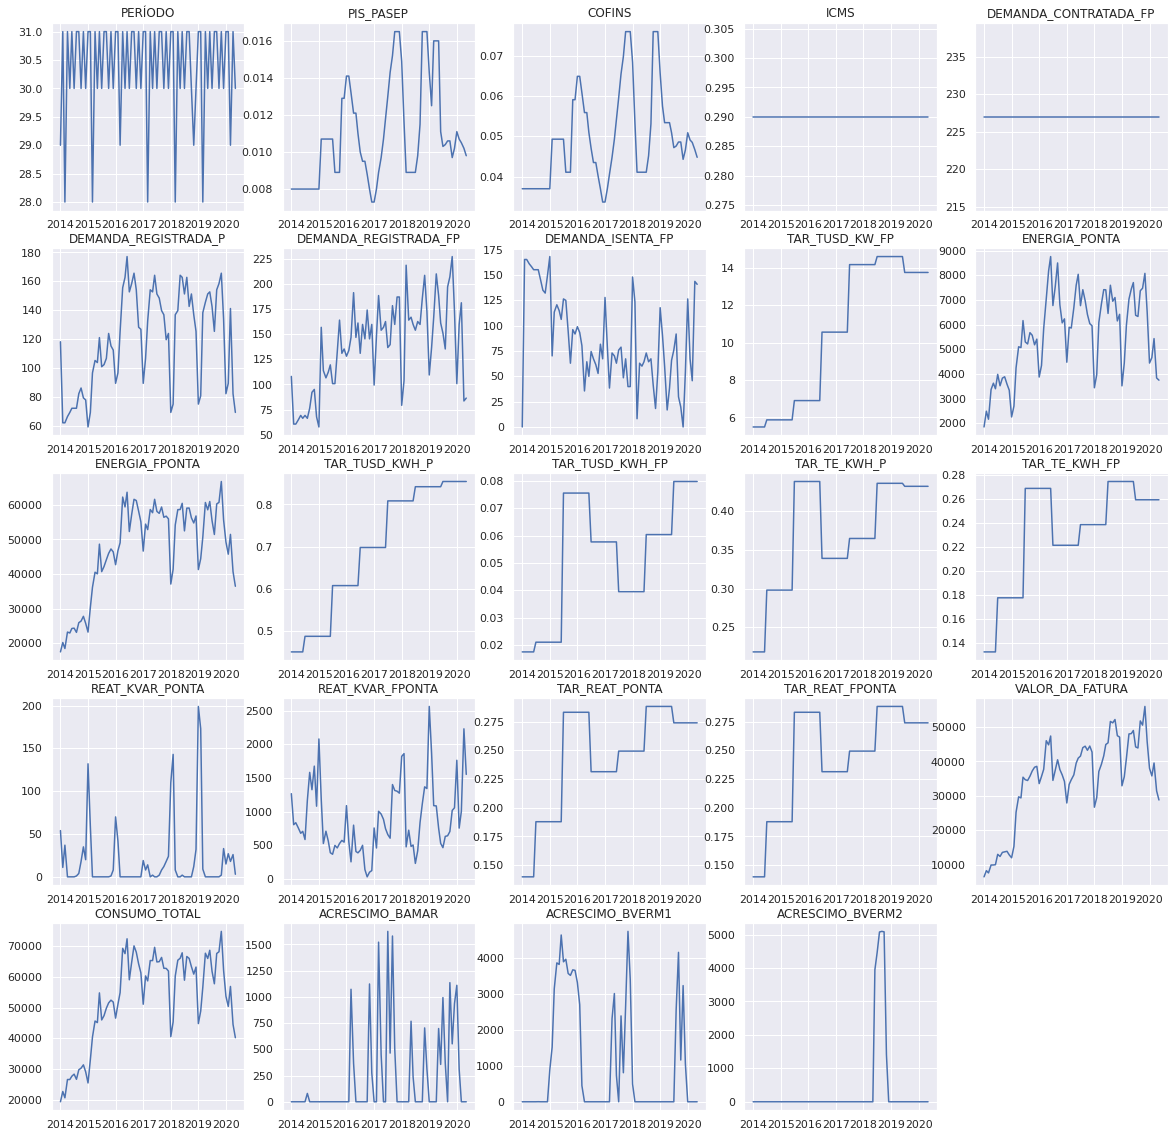

In [47]:
f, axs = plt.subplots(5, 4,figsize=(20,20))
for i,col in enumerate(UC5_df.columns[3:]):
  plt.subplot(5, 5, i+1)
  plt.title(col)
  plt.plot(UC5_df.DATA, UC5_df[col])

In [48]:
outliers = z_score(UC5_df[["DEMANDA_REGISTRADA_P"]].values, 4)
outliers


[]

In [49]:
outliers = z_score(UC5_df[["DEMANDA_REGISTRADA_FP"]].values, 4)
outliers


[]

In [50]:
outliers = z_score(UC5_df[["DEMANDA_ISENTA_FP"]].values, 4)
outliers


[]

In [51]:
outliers = z_score(UC5_df[["TAR_TUSD_KW_FP"]].values, 4)
outliers


[]

In [52]:
outliers = z_score(UC5_df[["ENERGIA_PONTA"]].values, 4)
outliers


[]

In [53]:
outliers = z_score(UC5_df[["ENERGIA_FPONTA"]].values, 4)
outliers


[]

In [54]:
outliers = z_score(UC5_df[["TAR_TUSD_KWH_P"]].values, 4)
outliers


[]

In [55]:
outliers = z_score(UC5_df[["TAR_TUSD_KWH_FP"]].values, 4)
outliers


[]

In [56]:
outliers = z_score(UC5_df[["TAR_TE_KWH_P"]].values, 4)
outliers


[]

In [57]:
outliers = z_score(UC5_df[["TAR_TE_KWH_FP"]].values, 4)
outliers


[]

In [58]:
outliers = z_score(UC5_df[["REAT_KVAR_PONTA"]].values, 4)
outliers


[array([199])]

In [59]:
print(len(outliers)/len(UC5_df[["REAT_KVAR_PONTA"]].values)*100, "%")

1.2987012987012987 %


In [60]:
outliers = z_score(UC5_df[["REAT_KVAR_PONTA"]].values)
outliers

[array([199])]

In [61]:
index_value = UC5_df[["REAT_KVAR_PONTA"]][UC5_df[["REAT_KVAR_PONTA"]].eq(199).any(1)].index.tolist()[0]
UC5_df.at[index_value, 'REAT_KVAR_PONTA'] = UC5_df.REAT_KVAR_PONTA.mode()

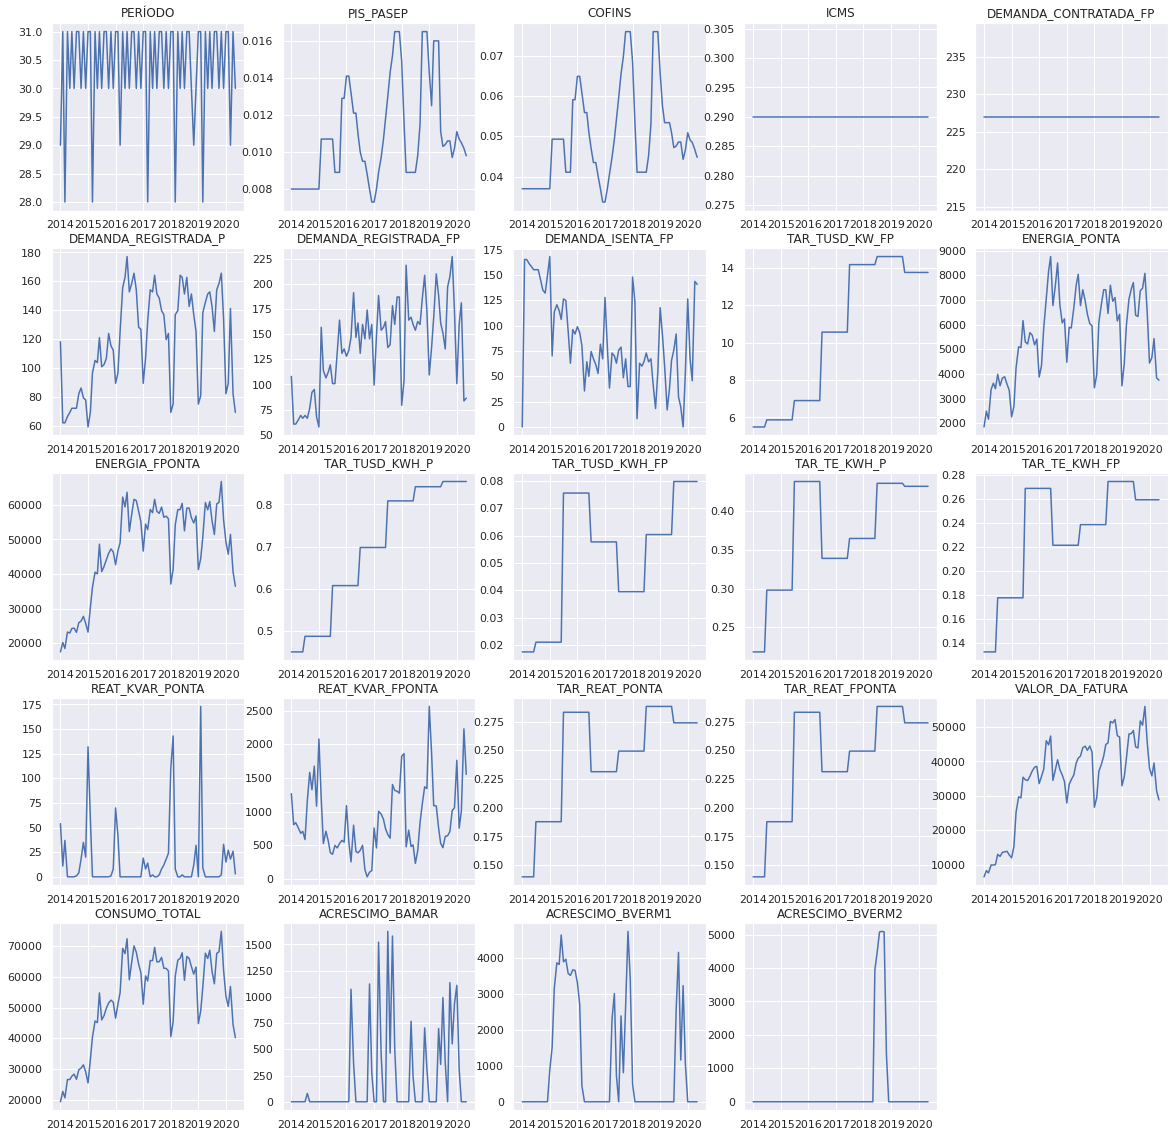

In [62]:
f, axs = plt.subplots(5, 4,figsize=(20,20))
for i,col in enumerate(UC5_df.columns[3:]):
  plt.subplot(5, 5, i+1)
  plt.title(col)
  plt.plot(UC5_df.DATA, UC5_df[col])

In [63]:
outliers = z_score(UC5_df[["REAT_KVAR_FPONTA"]].values, 4)
outliers


[]

In [64]:
outliers = z_score(UC5_df[["TAR_REAT_PONTA"]].values, 4)
outliers


[]

In [65]:
outliers = z_score(UC5_df[["TAR_REAT_FPONTA"]].values, 4)
outliers


[]

In [66]:
outliers = z_score(UC5_df[["VALOR_DA_FATURA"]].values, 4)
outliers


[]

In [67]:
outliers = z_score(UC5_df[["CONSUMO_TOTAL"]].values, 4)
outliers


[]

In [68]:
outliers = z_score(UC5_df[["ACRESCIMO_BAMAR"]].values, 4)
outliers


[]

In [69]:
outliers = z_score(UC5_df[["ACRESCIMO_BVERM1"]].values, 4)
outliers


[]

In [70]:
outliers = z_score(UC5_df[["ACRESCIMO_BVERM2"]].values, 4)
outliers

[array([5077.97]), array([5096.53]), array([5082.81])]

In [71]:
print(len(outliers)/len(UC5_df[["ACRESCIMO_BVERM2"]].values)*100, "%")

3.896103896103896 %


In [72]:
outliers = z_score(UC5_df[["ACRESCIMO_BVERM2"]].values)
outliers

[array([5077.97]), array([5096.53]), array([5082.81])]

In [73]:
index_value = UC5_df[["ACRESCIMO_BVERM2"]][UC5_df[["ACRESCIMO_BVERM2"]].eq(4463.18).any(1)].index.tolist()[0]
UC5_df.at[index_value, 'ACRESCIMO_BVERM2'] = UC5_df.ACRESCIMO_BVERM2.mode()

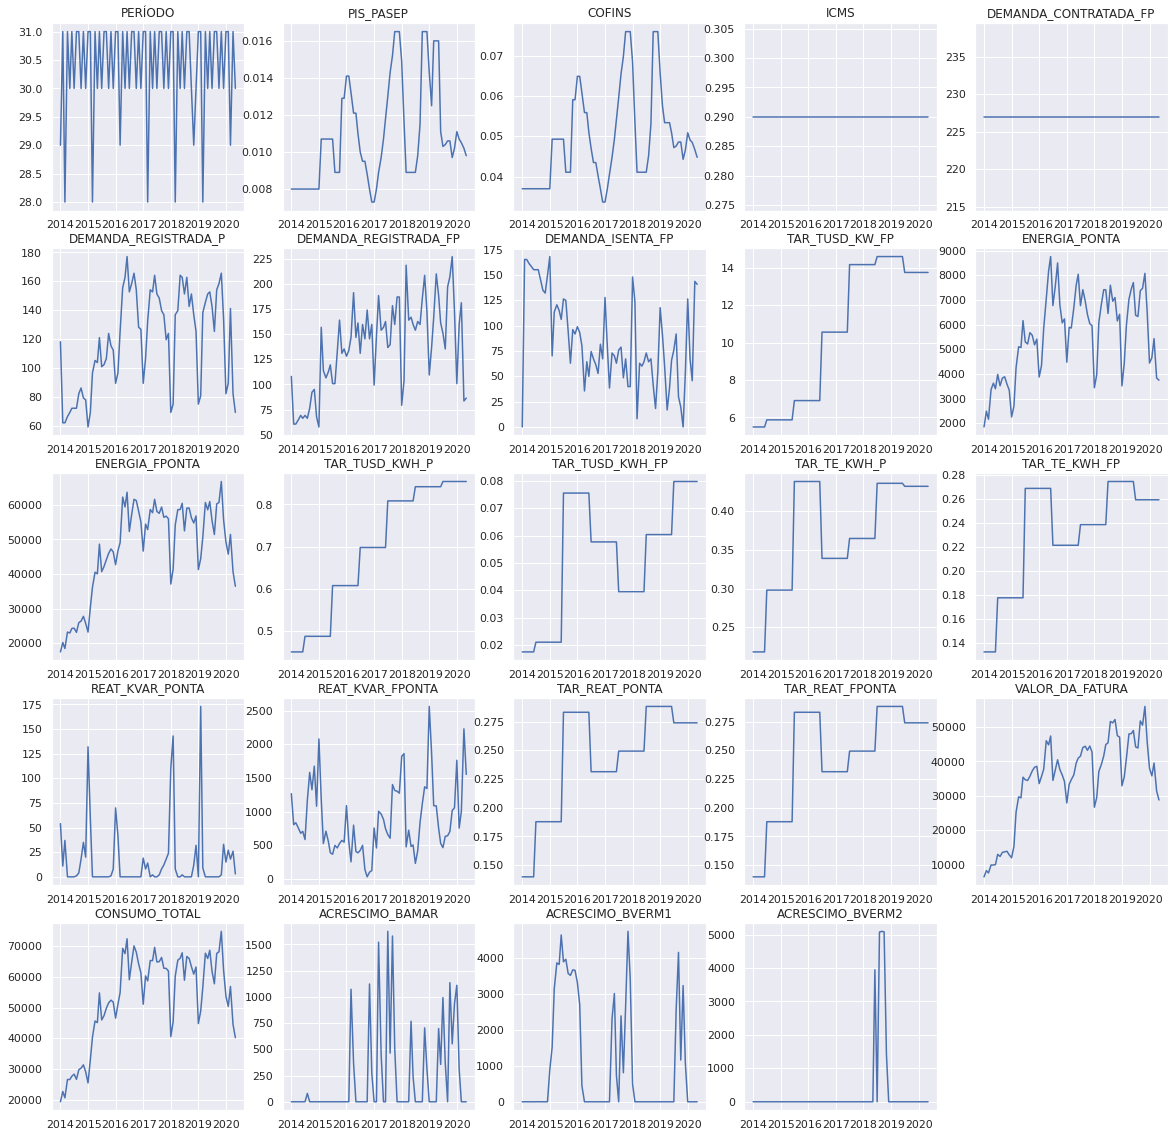

In [74]:
f, axs = plt.subplots(5, 4,figsize=(20,20))
for i,col in enumerate(UC5_df.columns[3:]):
  plt.subplot(5, 5, i+1)
  plt.title(col)
  plt.plot(UC5_df.DATA, UC5_df[col])

In [75]:
outliers = z_score(UC6_df[["ANO"]].values, 4)
outliers


[]

In [76]:
outliers = z_score(UC6_df[["PERÍODO"]].values, 4)
outliers


[]

In [77]:
outliers = z_score(UC6_df[["PIS_PASEP"]].values, 4)
outliers


[]

In [78]:
outliers = z_score(UC6_df[["COFINS"]].values, 4)
outliers


[]

In [79]:
outliers = z_score(UC6_df[["ICMS"]].values, 4)
outliers


[]

In [80]:
outliers = z_score(UC6_df[["DEMANDA_CONTRATADA_FP"]].values, 4)
outliers


[]

In [81]:
outliers = z_score(UC6_df[["DEMANDA_REGISTRADA_P"]].values, 4)
outliers


[]

In [82]:
outliers = z_score(UC6_df[["DEMANDA_REGISTRADA_FP"]].values, 4)
outliers


[]

In [83]:
outliers = z_score(UC6_df[["DEMANDA_ISENTA_FP"]].values, 4)
outliers


[]

In [84]:
outliers = z_score(UC6_df[["TAR_TUSD_KW_FP"]].values, 4)
outliers


[]

In [85]:
outliers = z_score(UC6_df[["ENERGIA_PONTA"]].values, 4)
outliers


[]

In [86]:
outliers = z_score(UC6_df[["ENERGIA_PONTA"]].values, 4)
outliers


[]

In [87]:
outliers = z_score(UC6_df[["TAR_TUSD_KWH_P"]].values, 4)
outliers


[]

In [88]:
outliers = z_score(UC6_df[["TAR_TUSD_KWH_FP"]].values, 4)
outliers


[]

In [89]:
outliers = z_score(UC6_df[["TAR_TE_KWH_P"]].values, 4)
outliers


[]

In [90]:
outliers = z_score(UC6_df[["TAR_TE_KWH_FP"]].values, 4)
outliers


[]

In [91]:
outliers = z_score(UC6_df[["REAT_KVAR_PONTA"]].values, 4)
outliers


[]

In [92]:
outliers = z_score(UC6_df[["REAT_KVAR_FPONTA"]].values, 4)
outliers


[]

In [93]:
outliers = z_score(UC6_df[["TAR_REAT_PONTA"]].values, 4)
outliers


[]

In [94]:
outliers = z_score(UC6_df[["TAR_REAT_FPONTA"]].values, 4)
outliers


[]

In [95]:
outliers = z_score(UC6_df[["VALOR_DA_FATURA"]].values, 4)
outliers


[]

In [96]:
outliers = z_score(UC6_df[["CONSUMO_TOTAL"]].values, 4)
outliers


[]

In [97]:
outliers = z_score(UC6_df[["ACRESCIMO_BAMAR"]].values, 4)
outliers


[]

In [98]:
outliers = z_score(UC6_df[["ACRESCIMO_BVERM1"]].values, 4)
outliers


[]

In [99]:
outliers = z_score(UC6_df[["ACRESCIMO_BVERM2"]].values, 4)
outliers

[array([2071.59])]

In [100]:
print(len(outliers)/len(UC6_df[["ACRESCIMO_BVERM2"]].values)*100, "%")

1.6666666666666667 %


In [101]:
outliers = z_score(UC6_df[["ACRESCIMO_BVERM2"]].values)
outliers

[array([2071.59])]

In [102]:
index_value = UC6_df[["ACRESCIMO_BVERM2"]][UC6_df[["ACRESCIMO_BVERM2"]].eq(2071.59).any(1)].index.tolist()[0]
UC6_df.at[index_value, 'ACRESCIMO_BVERM2'] = UC6_df.ACRESCIMO_BVERM2.mode()

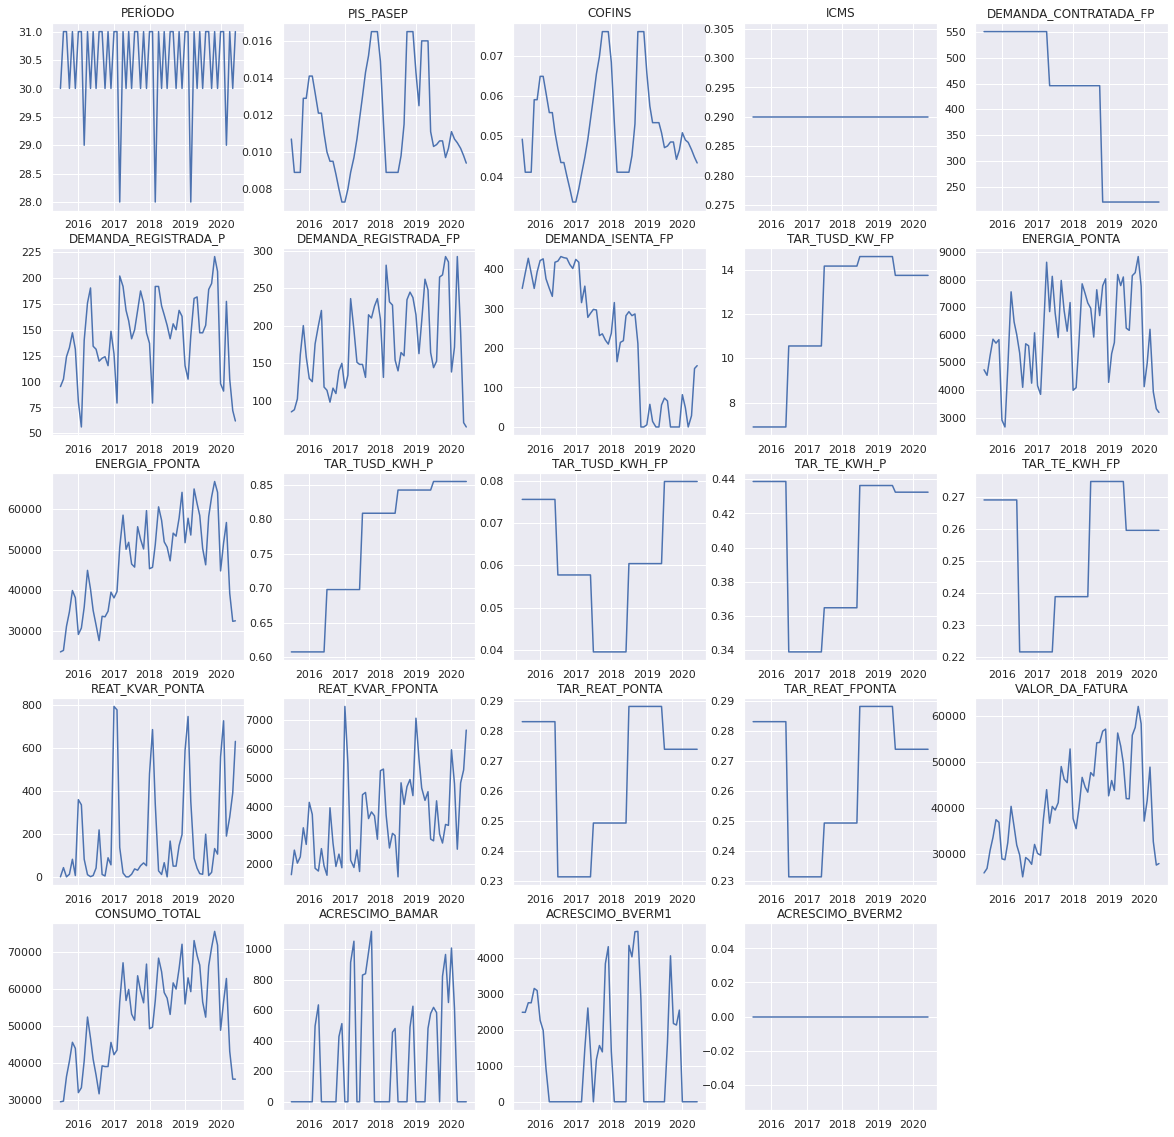

In [103]:
f, axs = plt.subplots(5, 4,figsize=(20,20))
for i,col in enumerate(UC6_df.columns[3:]):
  plt.subplot(5, 5, i+1)
  plt.title(col)
  plt.plot(UC6_df.DATA, UC6_df[col])

## Matriz de Correlação de Dados sem outlier

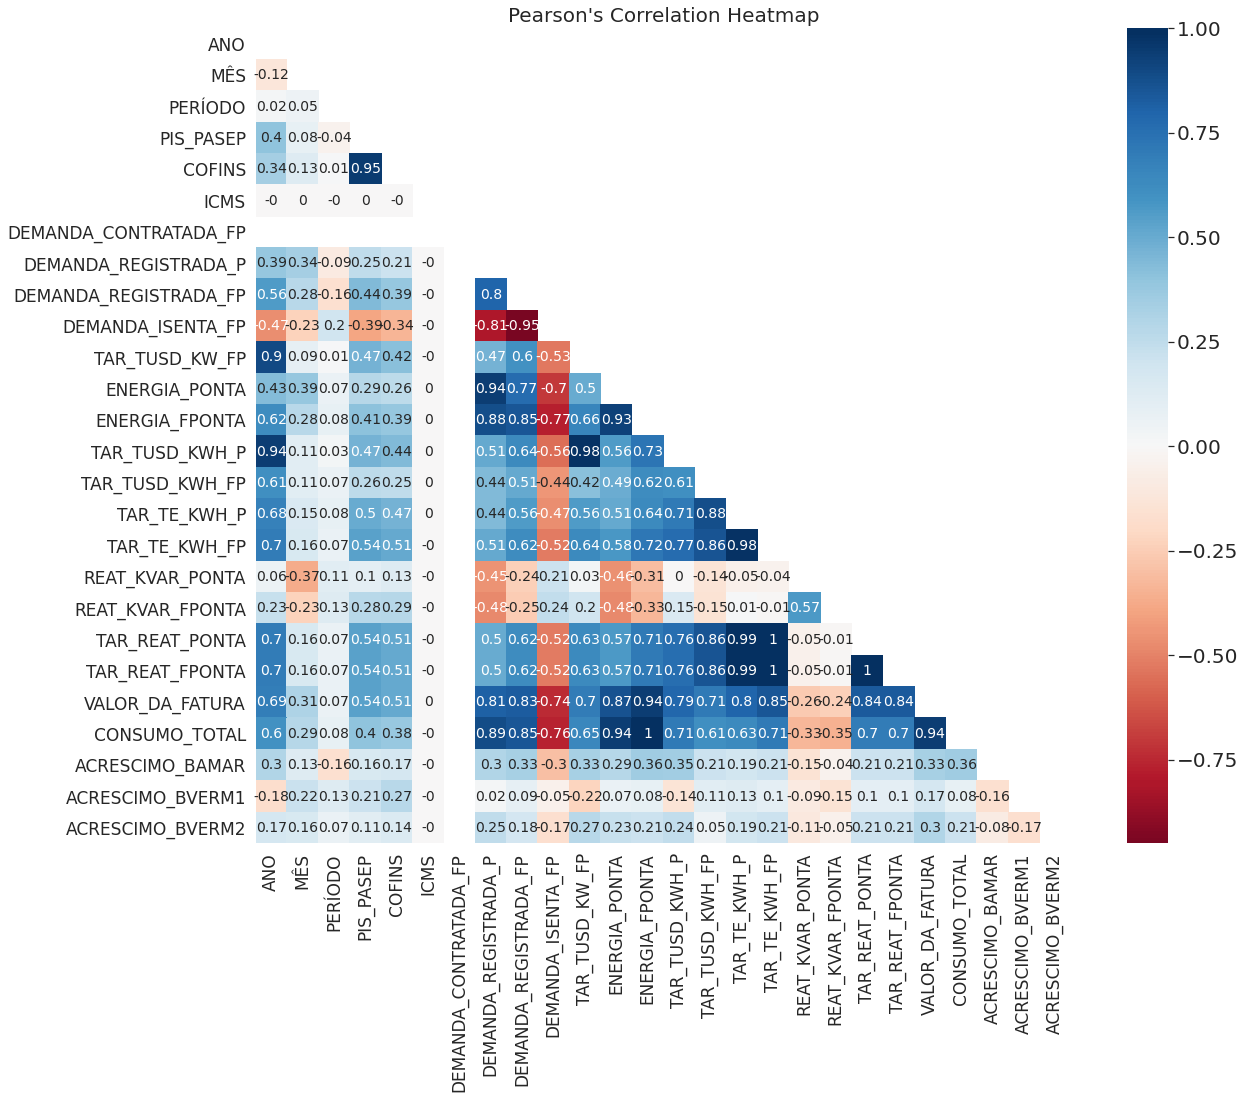

In [104]:
cor = UC5_df
pear = round(cor.corr(),2)
teste = np.array(pear)
mask = np.zeros_like(pear)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20, 15))
    ax = sns.heatmap(pear, mask=mask, vmax=1, square=True,center=0,annot=True,annot_kws={"fontsize":14}, cmap="RdBu")
    plt.title('''Pearson's Correlation Heatmap''',fontsize = 20)
    plt.xticks(fontsize=17,rotation=90)
    plt.yticks(fontsize=17,rotation=0)
    cax = plt.gcf().axes[-1] #para alterar fonte do eixo y direito
    cax.tick_params(labelsize=20) #para alterar fonte do eixo y direito

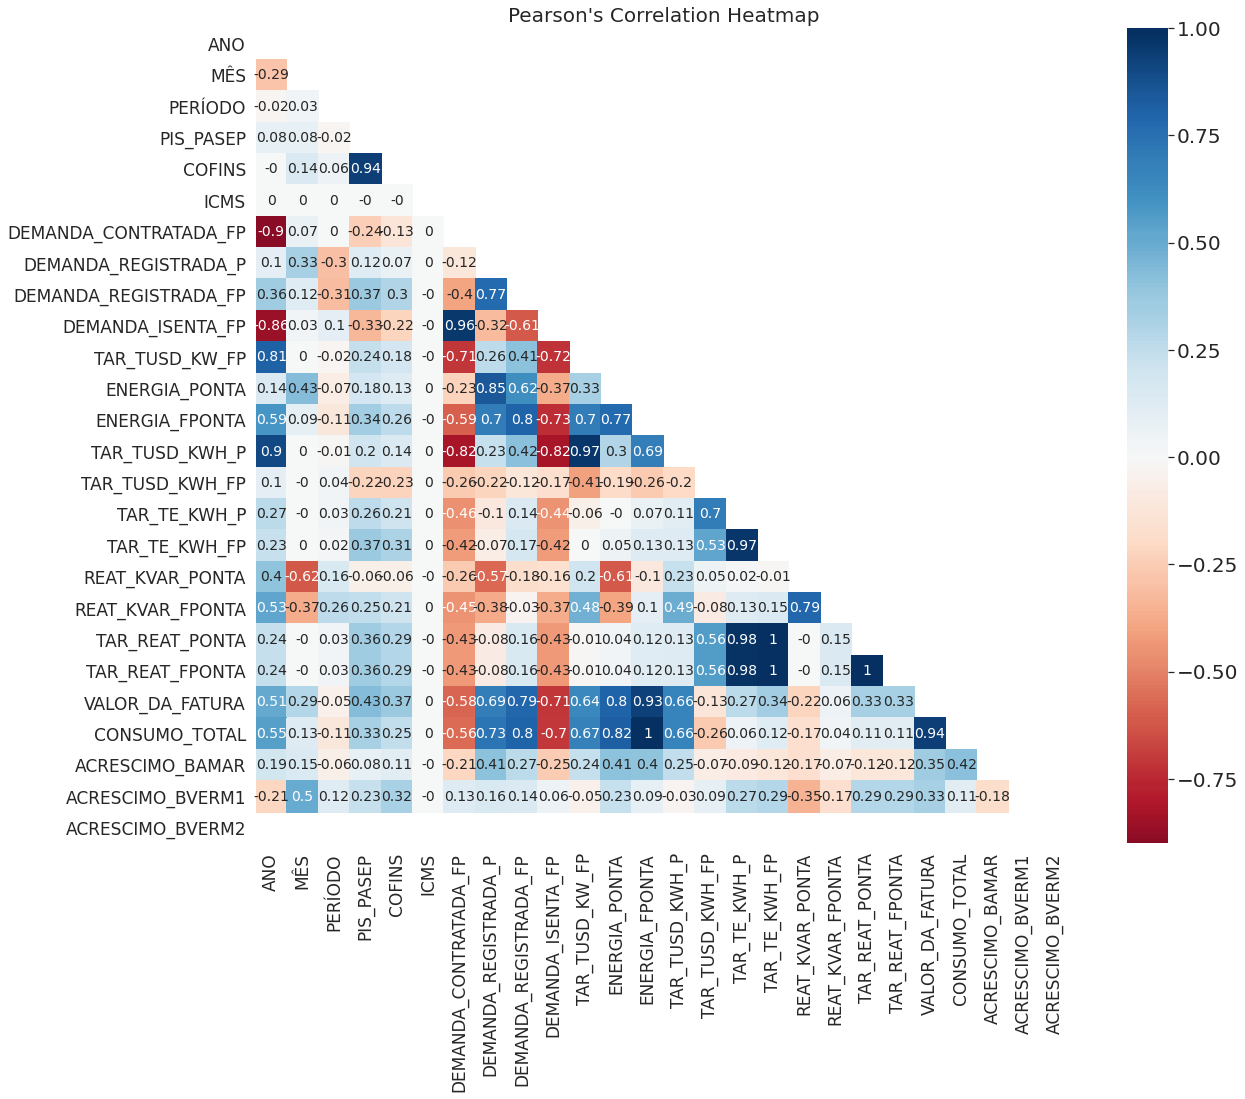

In [105]:
cor = UC6_df
pear = round(cor.corr(),2)
teste = np.array(pear)
mask = np.zeros_like(pear)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20, 15))
    ax = sns.heatmap(pear, mask=mask, vmax=1, square=True,center=0,annot=True,annot_kws={"fontsize":14}, cmap="RdBu")
    plt.title('''Pearson's Correlation Heatmap''',fontsize = 20)
    plt.xticks(fontsize=17,rotation=90)
    plt.yticks(fontsize=17,rotation=0)
    cax = plt.gcf().axes[-1] #para alterar fonte do eixo y direito
    cax.tick_params(labelsize=20) #para alterar fonte do eixo y direito

## Exemplo de Diagrama de Dispersão de Variaveis não Correlacionadas e Correlacionadas

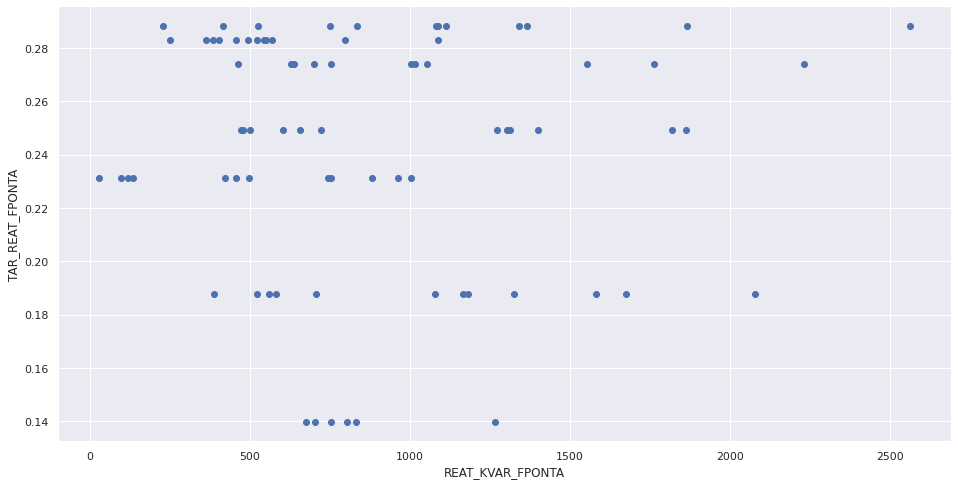

In [106]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(UC5_df["REAT_KVAR_FPONTA"], UC5_df["TAR_REAT_FPONTA"])
ax.set_xlabel('REAT_KVAR_FPONTA')
ax.set_ylabel('TAR_REAT_FPONTA')
plt.show()

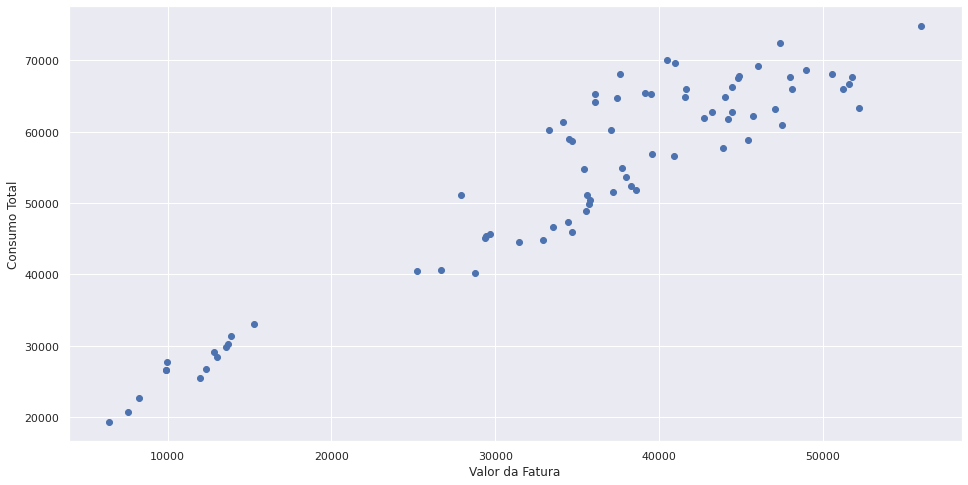

In [107]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(UC5_df["VALOR_DA_FATURA"], UC5_df["CONSUMO_TOTAL"])
ax.set_xlabel('Valor da Fatura')
ax.set_ylabel('Consumo Total')
plt.show()

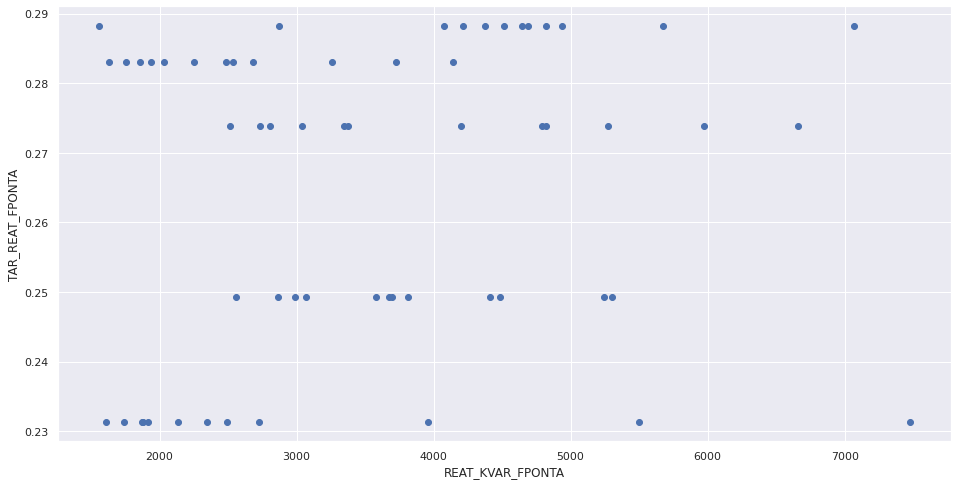

In [108]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(UC6_df["REAT_KVAR_FPONTA"], UC6_df["TAR_REAT_FPONTA"])
ax.set_xlabel('REAT_KVAR_FPONTA')
ax.set_ylabel('TAR_REAT_FPONTA')
plt.show()

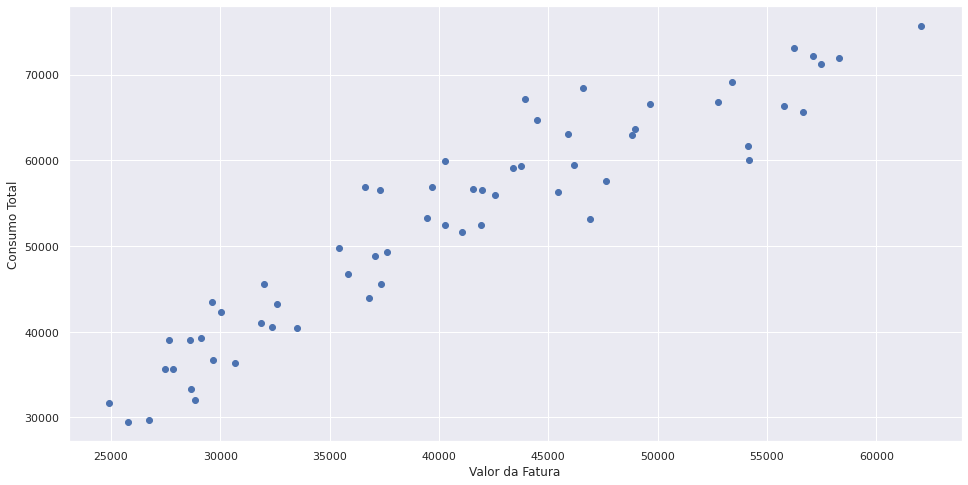

In [109]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(UC6_df["VALOR_DA_FATURA"], UC6_df["CONSUMO_TOTAL"])
ax.set_xlabel('Valor da Fatura')
ax.set_ylabel('Consumo Total')
plt.show()

# Exportação para csv

In [110]:
#import glob
#from google.colab import files

In [111]:
#UC5_df.to_csv('uc5.csv')
#files.download('uc5.csv')

In [112]:
#UC6_df.to_csv('uc6.csv')
#files.download('uc6.csv')

# Modeling UC5

In [113]:
df_train = UC5_df["CONSUMO_TOTAL"].iloc[:65]
df_test = UC5_df["CONSUMO_TOTAL"].iloc[65:]

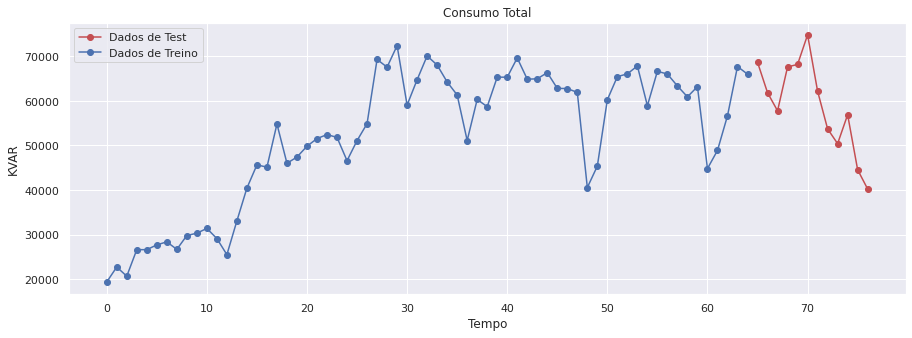

In [114]:
fig, ax = plt.subplots(figsize=(15, 5))
_ = plt.plot(df_test, marker='o', color="r")
_ = plt.plot(df_train, marker='o', color="b")
_ = plt.xlabel("Tempo")
_ = plt.ylabel("KVAR")
_ = plt.legend([ 'Dados de Test', 'Dados de Treino'])
_ = plt.title("Consumo Total")
plt.show()

In [115]:
! pip install pmdarima

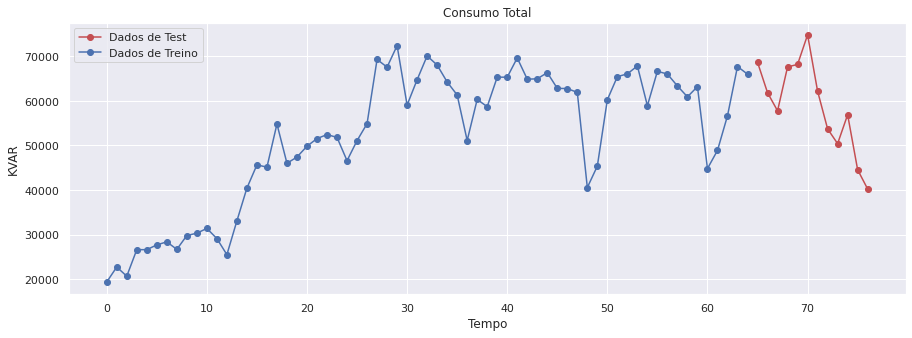

In [116]:
fig, ax = plt.subplots(figsize=(15, 5))
_ = plt.plot(df_test, marker='o', color="r")
_ = plt.plot(df_train, marker='o', color="b")
_ = plt.xlabel("Tempo")
_ = plt.ylabel("KVAR")
_ = plt.legend([ 'Dados de Test', 'Dados de Treino'])
_ = plt.title("Consumo Total")
plt.show()

In [117]:
from pmdarima.arima import ADFTest

In [118]:
from pmdarima.arima import auto_arima

In [119]:
adf_test = ADFTest(alpha=0.05)

In [120]:
adf_test.should_diff(df_train)

(0.6205715369395584, True)

In [121]:
arima_model = auto_arima(df_train, start_p=0, d=1, start_q=0, max_p=5, max_d=5, max_q=5, start_P=0, D=1, start_Q=0, max_P = 5, max_D = 5, max_Q=5, m=12, seasonal = True, error_action = 'warn', trace = True, supress_warning = True, stepwise = True, random_state= 20, nfits = 50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1039.624, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1036.650, Time=0.12 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1032.507, Time=0.10 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1033.583, Time=0.02 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1034.426, Time=0.13 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=1034.207, Time=0.18 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1032.496, Time=0.08 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1034.291, Time=0.25 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=1034.154, Time=0.47 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=1037.173, Time=0.05 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=1032.352, Time=0.10 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1033.188, Time=0.04 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1034.101, Time=0.27 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=1034.261, Time=0.18 sec
 ARIMA(1,1,1)(0,1,1

In [122]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   65
Model:             SARIMAX(3, 1, 0)x(0, 1, 0, 12)   Log Likelihood                -511.390
Date:                            Mon, 18 Jan 2021   AIC                           1030.780
Time:                                    01:25:37   BIC                           1038.585
Sample:                                         0   HQIC                          1033.772
                                             - 65                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3289      0.133     -2.468      0.014      -0.590      -0.068
ar.L2         -0.3917      0.110     -3.573      0.000      -0.607      -0.177
ar.L3         -0.2083      0.145     -1.435      0.151      -0.493       0.076
sigma2      2.122e+07   1.58e-09   1.34e+16      0.000    2.12e+07    2.12e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.59   Jarque-Bera (JB):                 1.22
Prob(Q):                              0.44   Prob(JB):                         0.54
Heteroskedasticity (H):               1.52   Skew:                             0.37
Prob(H) (two-sided):                  0.40   Kurtosis:                         3.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.89e+31. Standard errors may be unstable.
"""

In [123]:
predicoes = pd.DataFrame(arima_model.predict(n_periods = 12), index =df_test.index)
predicoes.columns = ['predicoes']

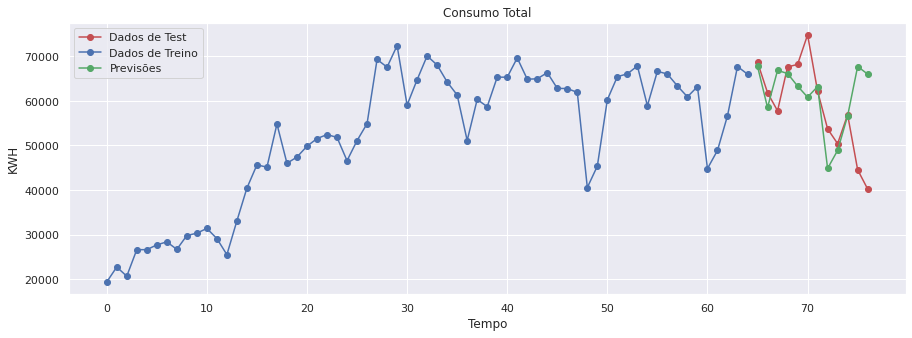

In [124]:
fig, ax = plt.subplots(figsize=(15, 5))
_ = plt.plot(df_test, marker='o', color="r")
_ = plt.plot(df_train, marker='o', color="b")
_ = plt.plot(predicoes, marker='o', color="g")
_ = plt.xlabel("Tempo")
_ = plt.ylabel("KWH")
_ = plt.legend([ 'Dados de Test', 'Dados de Treino', 'Previsões'])
_ = plt.title("Consumo Total")
plt.show()

# Avaliação UC5

$R M S E=\sqrt{\sum_{i=1}^{n} \frac{\left(\hat{y}_{i}-y_{i}\right)^{2}}{n}}$

In [125]:
def RMSE(yh, y):
  er = yh - y
  RMSE = sum(er*er/len(er))**0.5
  return RMSE

In [126]:
np.mean(RMSE(df_test.values, predicoes.values))

11625.921004534901

# Resultado Banco de dados com imputações UC5

In [127]:
UC5_df.describe()

ANO        MÊS  ...  ACRESCIMO_BVERM1  ACRESCIMO_BVERM2
count    77.000000  77.000000  ...         77.000000         77.000000
mean   2016.727273   6.272727  ...       1029.952857        267.726753
std       1.875299   3.489218  ...       1551.372839       1086.096930
min    2014.000000   1.000000  ...          0.000000          0.000000
25%    2015.000000   3.000000  ...          0.000000          0.000000
50%    2017.000000   6.000000  ...          0.000000          0.000000
75%    2018.000000   9.000000  ...       2387.400000          0.000000
max    2020.000000  12.000000  ...       4737.440000       5096.530000

[8 rows x 26 columns]

In [128]:
UC5_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   DATA                   77 non-null     datetime64[ns]
 1   ANO                    77 non-null     int64         
 2   MÊS                    77 non-null     int64         
 3   PERÍODO                77 non-null     int64         
 4   PIS_PASEP              77 non-null     float64       
 5   COFINS                 77 non-null     float64       
 6   ICMS                   77 non-null     float64       
 7   DEMANDA_CONTRATADA_FP  77 non-null     float64       
 8   DEMANDA_REGISTRADA_P   77 non-null     float64       
 9   DEMANDA_REGISTRADA_FP  77 non-null     float64       
 10  DEMANDA_ISENTA_FP      77 non-null     float64       
 11  TAR_TUSD_KW_FP         77 non-null     float64       
 12  ENERGIA_PONTA          77 non-null     int64         
 13  ENERGIA

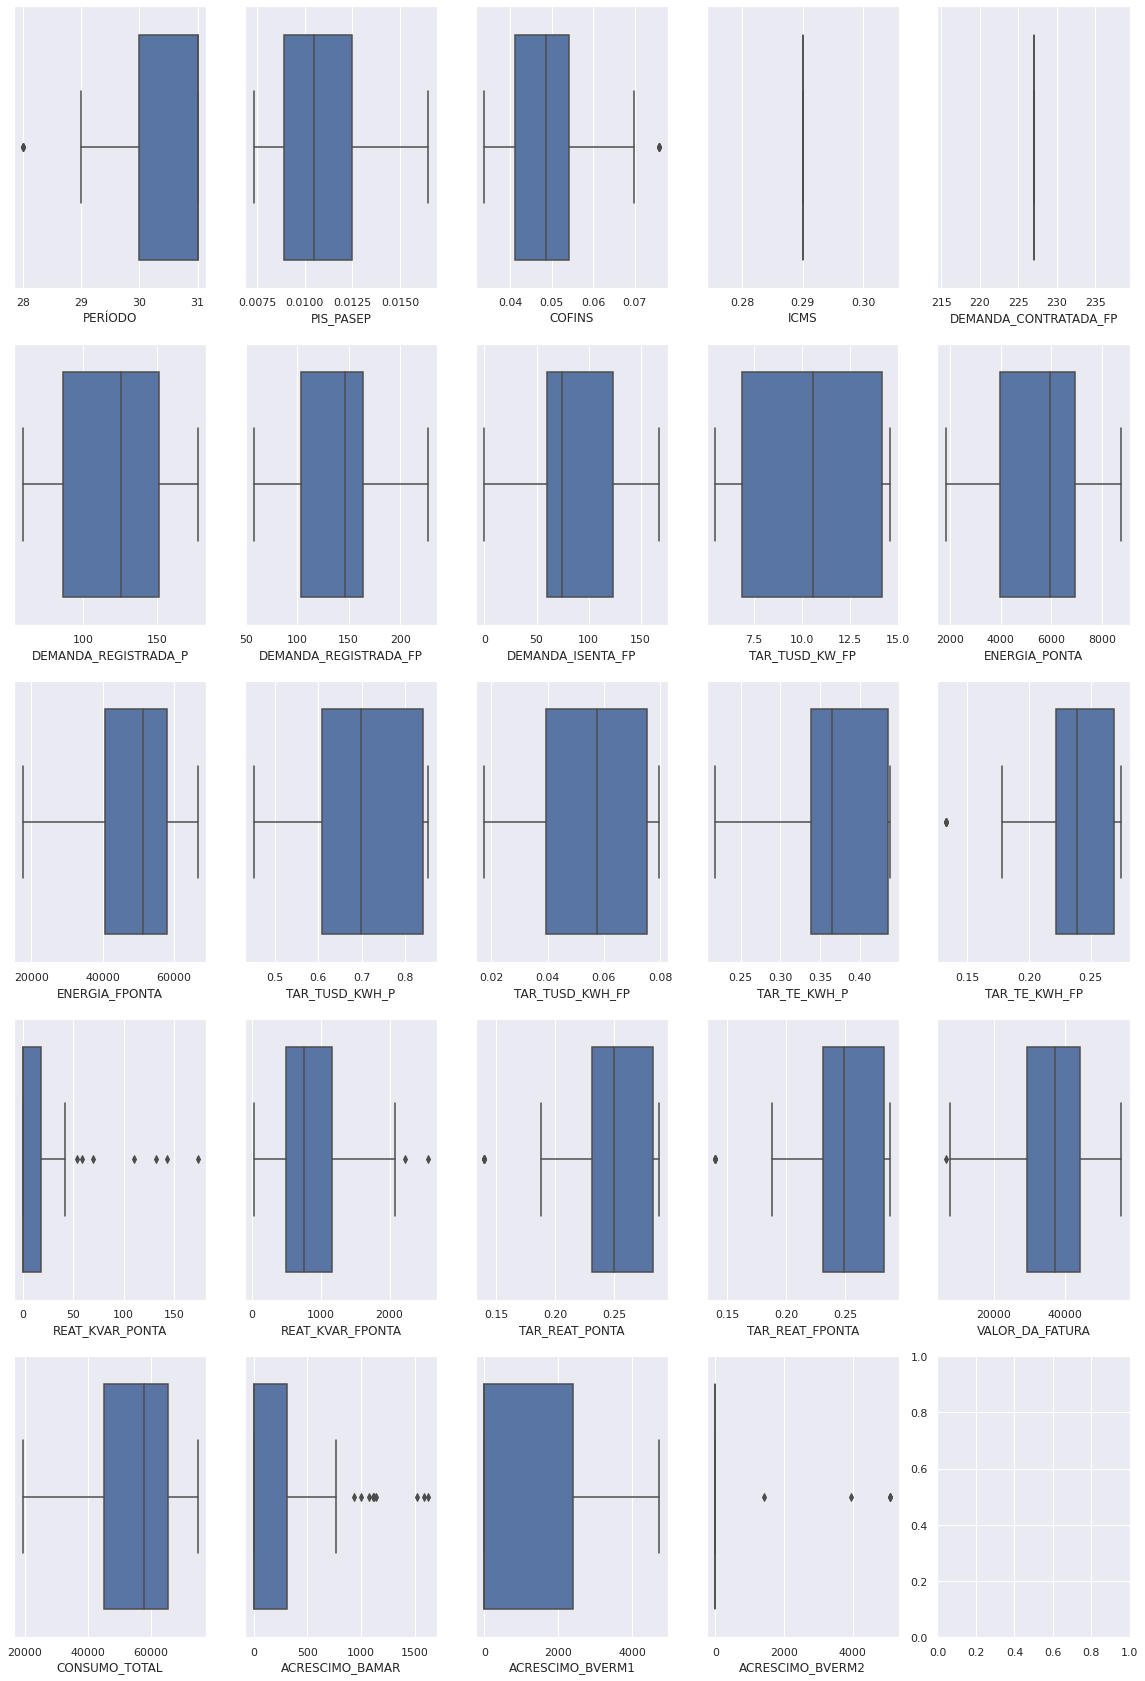

In [129]:
f, axs = plt.subplots(5, 5,figsize=(20,30))
for i,col in enumerate(UC5_df.columns[3:]):
  plt.subplot(5, 5, i+1)
  sns.boxplot(x=UC5_df[col])

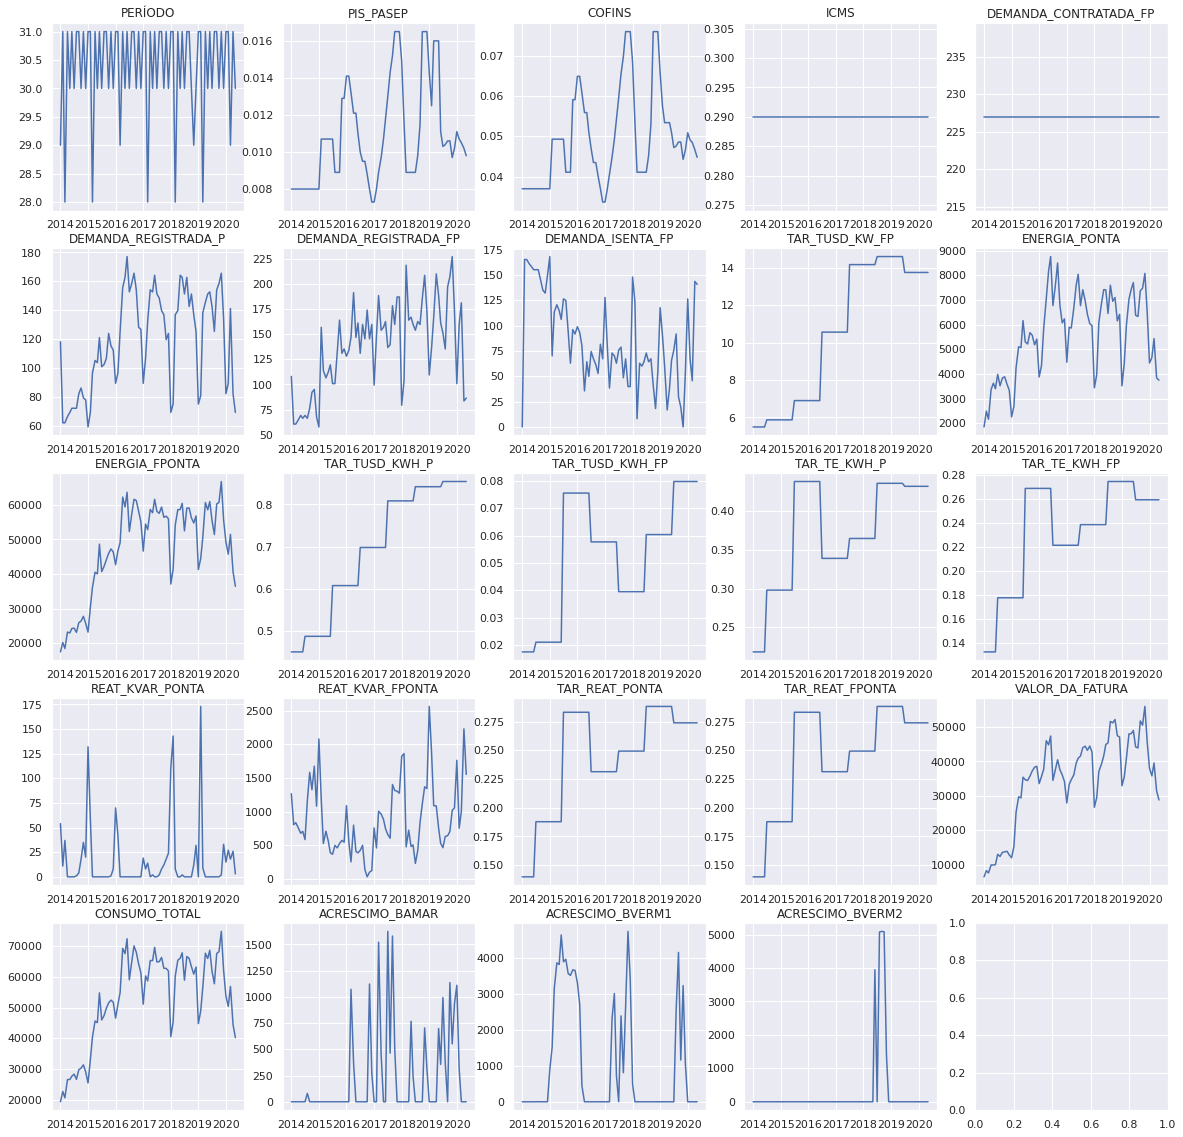

In [130]:
f, axs = plt.subplots(5, 5,figsize=(20,20))
for i,col in enumerate(UC5_df.columns[3:]):
  plt.subplot(5, 5, i+1)
  plt.title(col)
  plt.plot(UC5_df.DATA, UC5_df[col])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


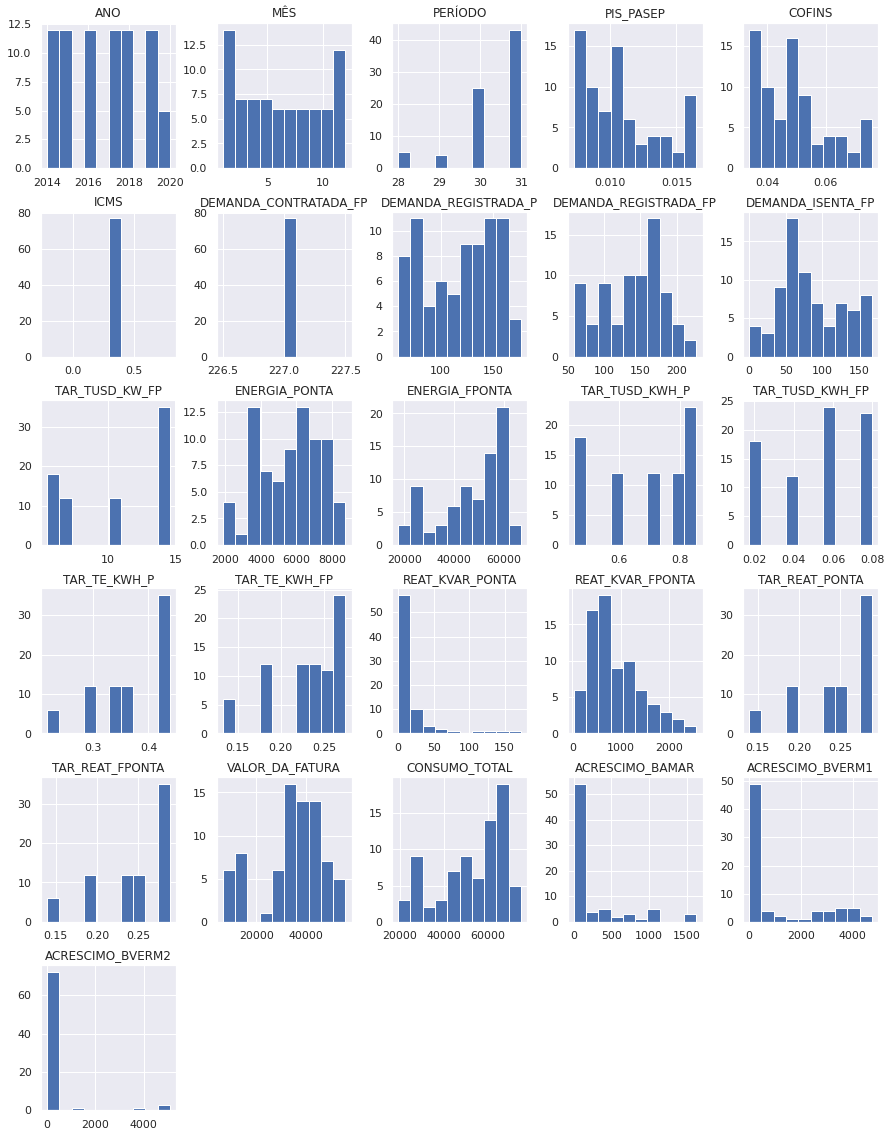

In [131]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
UC5_df.hist(ax = ax);

In [132]:
UC5_df.to_csv(r'UC5.csv', index = False)

In [133]:
#sns.pairplot(UC5_df[3:], palette='bwr')

# Modeling UC6

In [144]:
df_train = UC6_df["CONSUMO_TOTAL"].iloc[:48]
df_test = UC6_df["CONSUMO_TOTAL"].iloc[48:]

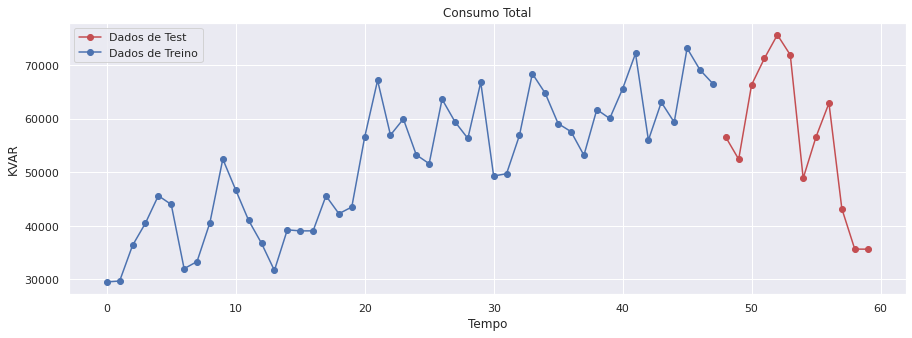

In [145]:
fig, ax = plt.subplots(figsize=(15, 5))
_ = plt.plot(df_test, marker='o', color="r")
_ = plt.plot(df_train, marker='o', color="b")
_ = plt.xlabel("Tempo")
_ = plt.ylabel("KVAR")
_ = plt.legend([ 'Dados de Test', 'Dados de Treino'])
_ = plt.title("Consumo Total")
plt.show()

In [146]:
! pip install pmdarima

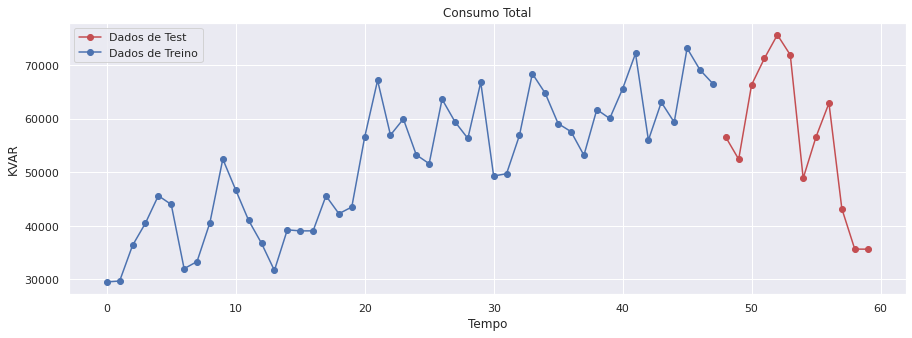

In [147]:
fig, ax = plt.subplots(figsize=(15, 5))
_ = plt.plot(df_test, marker='o', color="r")
_ = plt.plot(df_train, marker='o', color="b")
_ = plt.xlabel("Tempo")
_ = plt.ylabel("KVAR")
_ = plt.legend([ 'Dados de Test', 'Dados de Treino'])
_ = plt.title("Consumo Total")
plt.show()

In [148]:
from pmdarima.arima import ADFTest

In [149]:
from pmdarima.arima import auto_arima

In [150]:
adf_test = ADFTest(alpha=0.05)

In [151]:
adf_test.should_diff(df_train)

(0.07202638227293395, True)

In [152]:
arima_model = auto_arima(df_train, start_p=0, d=1, start_q=0, max_p=5, max_d=5, max_q=5, start_P=0, D=1, start_Q=0, max_P = 5, max_D = 5, max_Q=5, m=12, seasonal = True, error_action = 'warn', trace = True, supress_warning = True, stepwise = True, random_state= 20, nfits = 50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=705.614, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=706.782, Time=0.07 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=705.678, Time=0.08 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=705.834, Time=0.05 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=704.903, Time=0.04 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=705.600, Time=0.11 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=705.188, Time=0.16 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=707.185, Time=0.27 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=705.544, Time=0.07 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=707.613, Time=0.12 sec
 ARIMA(0,1,0)(0,1,1)[12] intercept   : AIC=706.973, Time=0.06 sec

Best model:  ARIMA(0,1,0)(0,1,1)[12]          
Total fit time: 1.041 seconds


In [153]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                   48
Model:             SARIMAX(0, 1, 0)x(0, 1, [1], 12)   Log Likelihood                -350.451
Date:                              Mon, 18 Jan 2021   AIC                            704.903
Time:                                      01:31:26   BIC                            708.014
Sample:                                           0   HQIC                           705.977
                                               - 48                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12      -0.2563      0.134     -1.909      0.056      -0.519       0.007
sigma2      3.061e+07    1.9e-10   1.61e+17      0.000    3.06e+07    3.06e+07
===================================================================================
Ljung-Box (L1) (Q):                   5.16   Jarque-Bera (JB):                 1.29
Prob(Q):                              0.02   Prob(JB):                         0.52
Heteroskedasticity (H):               0.74   Skew:                            -0.41
Prob(H) (two-sided):                  0.61   Kurtosis:                         2.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.66e+33. Standard errors may be unstable.
"""

In [154]:
predicoes = pd.DataFrame(arima_model.predict(n_periods = 12), index =df_test.index)
predicoes.columns = ['predicoes']

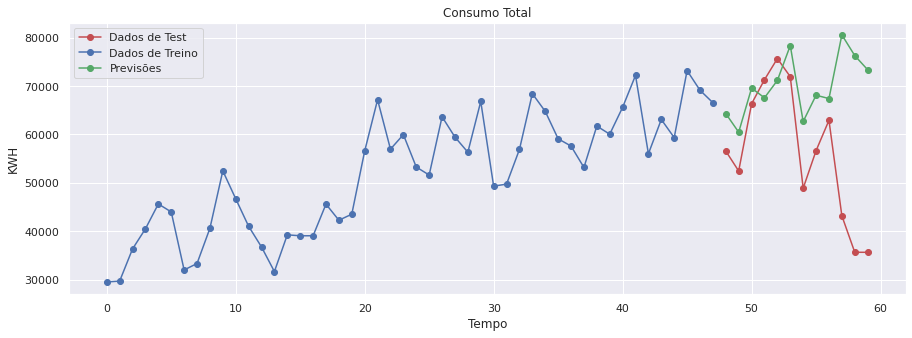

In [155]:
fig, ax = plt.subplots(figsize=(15, 5))
_ = plt.plot(df_test, marker='o', color="r")
_ = plt.plot(df_train, marker='o', color="b")
_ = plt.plot(predicoes, marker='o', color="g")
_ = plt.xlabel("Tempo")
_ = plt.ylabel("KWH")
_ = plt.legend([ 'Dados de Test', 'Dados de Treino', 'Previsões'])
_ = plt.title("Consumo Total")
plt.show()

# Avaliação UC6

$R M S E=\sqrt{\sum_{i=1}^{n} \frac{\left(\hat{y}_{i}-y_{i}\right)^{2}}{n}}$

In [156]:
def RMSE(yh, y):
  er = yh - y
  RMSE = sum(er*er/len(er))**0.5
  return RMSE

In [157]:
np.mean(RMSE(df_test.values, predicoes.values))

16976.233374666124

# Resultado Banco de dados com imputações UC6

In [158]:
UC6_df.describe()

ANO        MÊS  ...  ACRESCIMO_BVERM1  ACRESCIMO_BVERM2
count    60.000000  60.000000  ...         60.000000              60.0
mean   2017.500000   6.500000  ...       1243.514333               0.0
std       1.512658   3.481184  ...       1545.349166               0.0
min    2015.000000   1.000000  ...          0.000000               0.0
25%    2016.000000   3.750000  ...          0.000000               0.0
50%    2017.500000   6.500000  ...          0.000000               0.0
75%    2019.000000   9.250000  ...       2495.165000               0.0
max    2020.000000  12.000000  ...       4753.970000               0.0

[8 rows x 26 columns]

In [159]:
UC6_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   DATA                   60 non-null     datetime64[ns]
 1   ANO                    60 non-null     int64         
 2   MÊS                    60 non-null     int64         
 3   PERÍODO                60 non-null     int64         
 4   PIS_PASEP              60 non-null     float64       
 5   COFINS                 60 non-null     float64       
 6   ICMS                   60 non-null     float64       
 7   DEMANDA_CONTRATADA_FP  60 non-null     int64         
 8   DEMANDA_REGISTRADA_P   60 non-null     float64       
 9   DEMANDA_REGISTRADA_FP  60 non-null     float64       
 10  DEMANDA_ISENTA_FP      60 non-null     float64       
 11  TAR_TUSD_KW_FP         60 non-null     float64       
 12  ENERGIA_PONTA          60 non-null     int64         
 13  ENERGIA

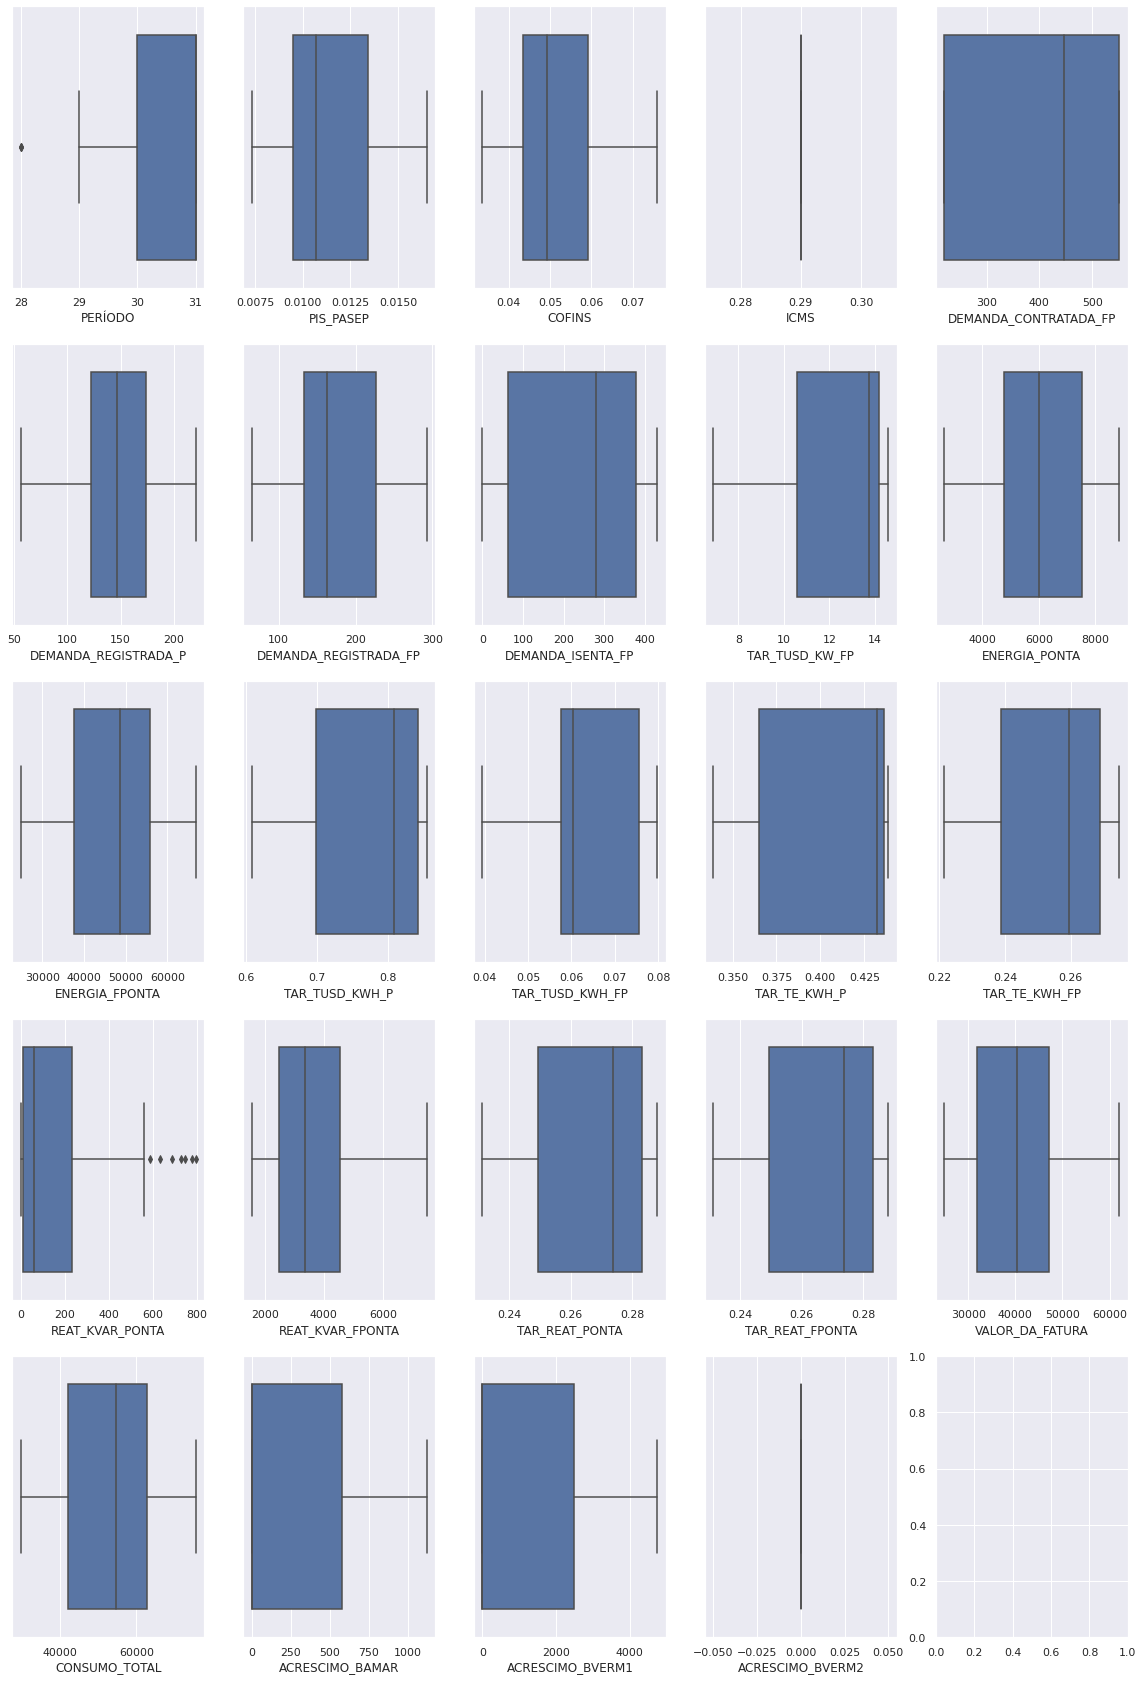

In [160]:
f, axs = plt.subplots(5, 5,figsize=(20,30))
for i,col in enumerate(UC6_df.columns[3:]):
  plt.subplot(5, 5, i+1)
  sns.boxplot(x=UC6_df[col])

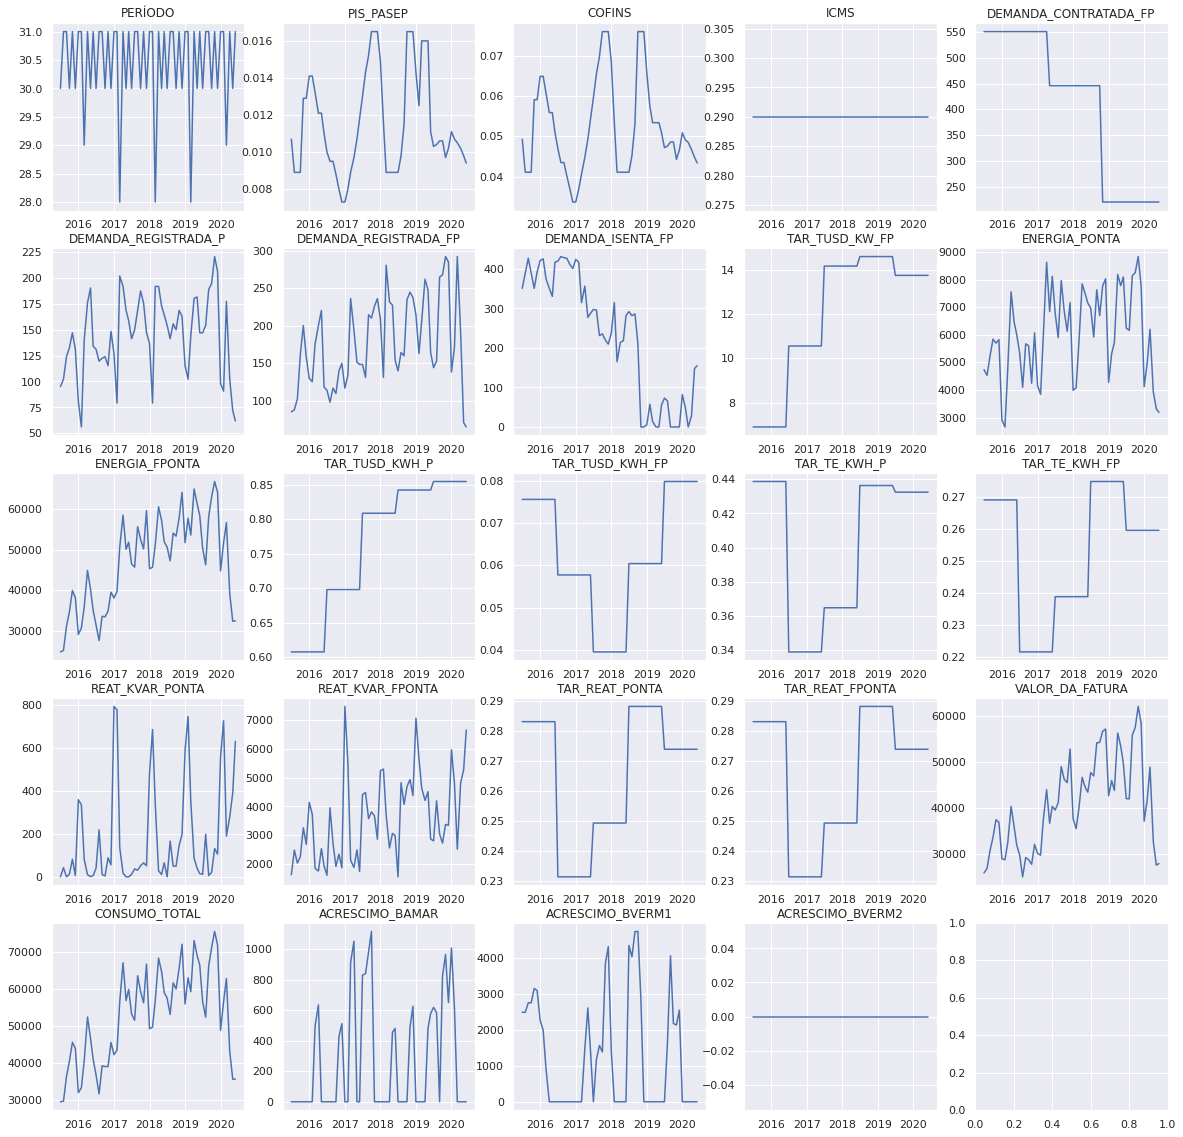

In [161]:
f, axs = plt.subplots(5, 5,figsize=(20,20))
for i,col in enumerate(UC6_df.columns[3:]):
  plt.subplot(5, 5, i+1)
  plt.title(col)
  plt.plot(UC6_df.DATA, UC6_df[col])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


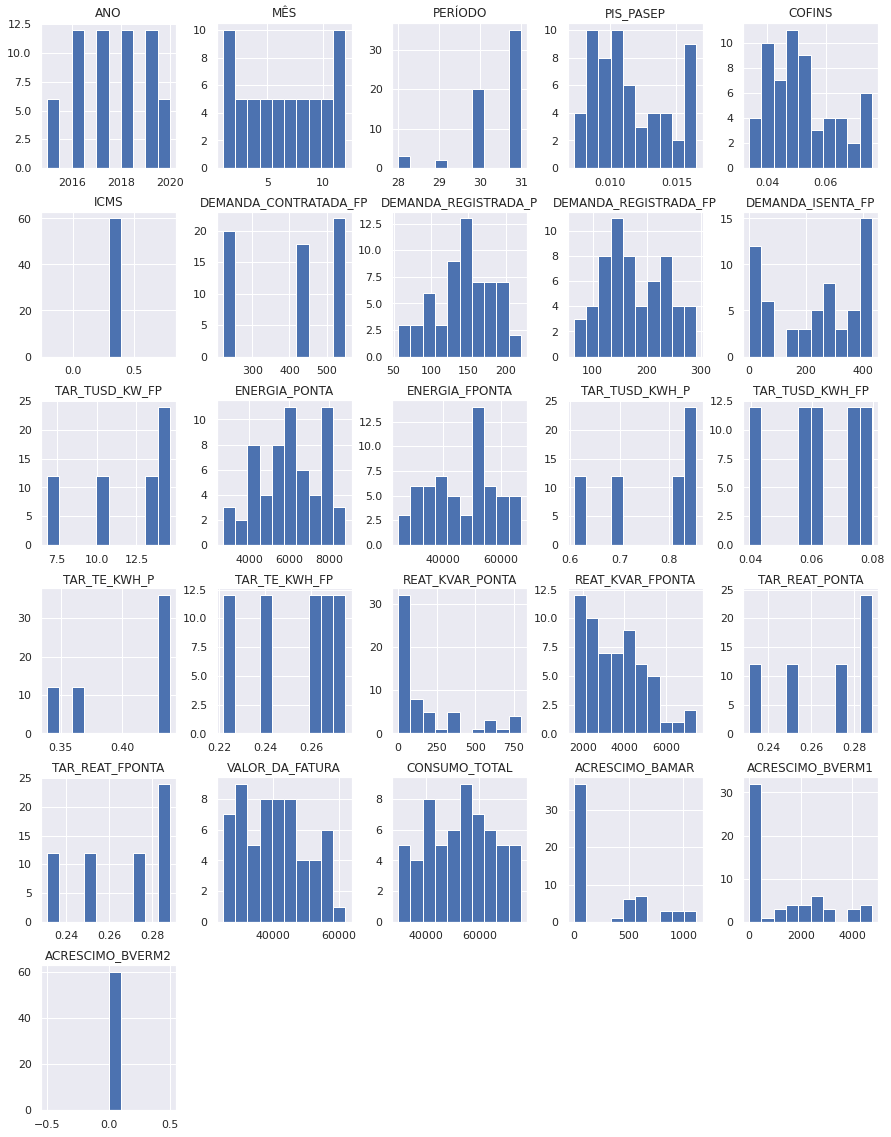

In [162]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
UC6_df.hist(ax = ax);

In [163]:
UC6_df.to_csv(r'UC6.csv', index = False)

In [ ]:
#sns.pairplot(UC6_df[3:], palette='bwr')